# Less Downtime, More Production! Predicting Machine Failures

![a5475df8-4644-4883-8210-f1d3bed73033_MachineLearning_1200x675_extra_large](a5475df8-4644-4883-8210-f1d3bed73033_MachineLearning_1200x675_extra_large.jpeg)

_Image taken from: https://www.reliableplant.com/Read/32281/machine-learning-predictive-maintenance_

## 📝 Project Scope and Recommendations 
The machine failure predictive model demonstrates exceptional accuracy and robustness, with 100% overall accuracy and perfect recall, ensuring minimal false positives and negatives. The analysis identifies critical variables such as torque (Nm), hydraulic pressure (bar), cutting force (kN), spindle speed (RPM), and coolant pressure (bar) as the most influential on machines. Specific machine models also performed highly, with accuracies ranging from 99.65% to 99.88%, effectively capturing the nuances of each unit’s operational behavior. These findings validate the model’s reliability and provide useful insights for proactive maintenance.

![descarga (3)](descarga%20(3).png)
_Results of the final general model_

### Key Recommendations
To improve machine performance and minimize downtime, the following specific measures are recommended based on the analysis:

**Optimize key parameters per machine:**

- **For L1 and L2 machines:** focus on balancing hydraulic pressure, torque, and cutting force, as these are the main factors influencing failures.

- **For L3 machine:** pay particular attention to spindle speed, as its interaction with torque, cutting force, and hydraulic pressure has a more pronounced impact.

**Implement more sophisticated monitoring systems:**

- Track cyclical patterns in failure rates, particularly at the end of months and on specific days of the week, such as Fridays and Sundays.

- Use this model to schedule predictive maintenance, targeting high-risk periods for intervention.

These recommendations align with machine-specific failure dynamics, ensuring operational stability and maximizing uptime while considering the unique behaviors of each unit.

## 💾 The Data

The company has organized the machine operation data into a single table, available in `'data/machine_downtime.csv'`.

### Each row in the table represents the operational data of a single machine for a specific day:
- **`"Date"`** – The date when the data was recorded.
- **`"Machine_ID"`** – The unique identifier of the machine being monitored.
- **`"Assembly_Line_No"`** – The unique identifier of the assembly line where the machine is located.
- **`"Hydraulic_Pressure(bar)"`**, **`"Coolant_Pressure(bar)"`**, and **`"Air_System_Pressure(bar)"`** – Pressure readings at various points within the machine.
- **`"Coolant_Temperature"`**, **`"Hydraulic_Oil_Temperature"`**, and **`"Spindle_Bearing_Temperature"`** – Temperature readings (in Celsius) at different parts of the machine.
- **`"Spindle_Vibration"`**, **`"Tool_Vibration"`**, and **`"Spindle_Speed(RPM)"`** – Vibration levels (measured in micrometers) and rotational speed of the spindle and tool.
- **`"Voltage(volts)"`** – The electrical voltage supplied to the machine.
- **`"Torque(Nm)"`** – The torque generated by the machine.
- **`"Cutting(KN)"`** – The cutting force applied by the tool.
- **`"Downtime"`** – A binary indicator showing whether the machine was operational or down on the given day.


## 🔍 Exploratory Analysis

Exploratory analysis is crucial to understand the relationships between variables and the target variable (`Downtime`). It allows identifying patterns, outliers and correlations that can improve the accuracy of the predictive model.

### Target Variable: `Downtime`

The `Downtime` variable is binary (0 or 1) and reflects whether the machine was operational or idle on a given day. This variable is the main target of the model, as our purpose is to predict machine failures. We will analyze its relationship with the other variables, as well as its characteristics, including the detection of null values ​​and the identification of atypical or noisy data.

In [1]:
import pandas as pd
import numpy as np
downtime = pd.read_csv('data/machine_downtime.csv')
downtime.sample(33, random_state=77)

Date            Machine_ID  ... Cutting(kN)            Downtime
237   28-01-2022  Makino-L3-Unit1-2015  ...        2.70  No_Machine_Failure
142   29-03-2022  Makino-L1-Unit1-2013  ...        1.88  No_Machine_Failure
1865  08-03-2022  Makino-L3-Unit1-2015  ...        2.40     Machine_Failure
1530  12-03-2022  Makino-L2-Unit1-2015  ...        1.85  No_Machine_Failure
1385  14-02-2022  Makino-L2-Unit1-2015  ...        2.79     Machine_Failure
755   21-03-2022  Makino-L2-Unit1-2015  ...        3.36  No_Machine_Failure
120   29-03-2022  Makino-L2-Unit1-2015  ...        2.69     Machine_Failure
58    30-03-2022  Makino-L2-Unit1-2015  ...        2.95  No_Machine_Failure
993   18-04-2022  Makino-L3-Unit1-2015  ...        2.96  No_Machine_Failure
399   25-03-2022  Makino-L2-Unit1-2015  ...        1.99  No_Machine_Failure
1756  09-05-2022  Makino-L3-Unit1-2015  ...        1.85  No_Machine_Failure
166   28-03-2022  Makino-L3-Unit1-2015  ...        2.56     Machine_Failure
1586  11-04-2022  Makino-L3-Unit1-2015  ...        3.00  No_Machine_Failure
360   26-02-2022  Makino-L2-Unit1-2015  ...        2.89     Machine_Failure
2285  03-03-2022  Makino-L1-Unit1-2013  ...        2.44     Machine_Failure
825   20-03-2022  Makino-L1-Unit1-2013  ...        2.17     Machine_Failure
2118  05-03-2022  Makino-L3-Unit1-2015  ...        1.88  No_Machine_Failure
1491  13-01-2022  Makino-L2-Unit1-2015  ...        2.80     Machine_Failure
397   25-03-2022  Makino-L3-Unit1-2015  ...        1.95  No_Machine_Failure
784   21-02-2022  Makino-L3-Unit1-2015  ...        3.55     Machine_Failure
792   21-02-2022  Makino-L2-Unit1-2015  ...        3.19  No_Machine_Failure
561   23-03-2022  Makino-L2-Unit1-2015  ...        3.10  No_Machine_Failure
1277  15-03-2022  Makino-L1-Unit1-2013  ...        1.85  No_Machine_Failure
1699  10-03-2022  Makino-L2-Unit1-2015  ...        2.94  No_Machine_Failure
1144  16-04-2022  Makino-L1-Unit1-2013  ...        1.86  No_Machine_Failure
2485  01-02-2022  Makino-L3-Unit1-2015  ...        3.67     Machine_Failure
2011  06-04-2022  Makino-L3-Unit1-2015  ...        1.95  No_Machine_Failure
1734  10-02-2022  Makino-L2-Unit1-2015  ...        2.85  No_Machine_Failure
44    30-12-2021  Makino-L3-Unit1-2015  ...        2.92  No_Machine_Failure
1646  11-02-2022  Makino-L3-Unit1-2015  ...        3.67     Machine_Failure
2483  01-03-2022  Makino-L2-Unit1-2015  ...        2.59     Machine_Failure
1002  18-03-2022  Makino-L3-Unit1-2015  ...        1.99  No_Machine_Failure
1706  10-03-2022  Makino-L3-Unit1-2015  ...        3.59     Machine_Failure

[33 rows x 16 columns]

Great! At first glance, there are almost no missing values, though a few nulls can be observed. Additionally, the categorical variables are completely clean, with 3 machines and 3 assembly lines. It seems that the only task left is to properly format the date variable.

In [2]:
downtime.groupby("Machine_ID")["Downtime"].value_counts(normalize=True).unstack().get("Machine_Failure", 0)*100

Machine_ID
Makino-L1-Unit1-2013    51.945080
Makino-L2-Unit1-2015    49.009901
Makino-L3-Unit1-2015    50.733496
Name: Machine_Failure, dtype: float64

Initial observations reveal that the machines are inoperative for about half of the time. Machine L1 exhibits the highest inactivity, with nearly 52%, while L2 shows fewer instances of downtime, at only 49%, resulting in a difference of no more than 3%.

In [3]:
downtime.isnull().mean() * 100

Date                           0.00
Machine_ID                     0.00
Assembly_Line_No               0.00
Hydraulic_Pressure(bar)        0.40
Coolant_Pressure(bar)          0.76
Air_System_Pressure(bar)       0.68
Coolant_Temperature            0.48
Hydraulic_Oil_Temperature      0.64
Spindle_Bearing_Temperature    0.28
Spindle_Vibration              0.44
Tool_Vibration                 0.44
Spindle_Speed(RPM)             0.24
Voltage(volts)                 0.24
Torque(Nm)                     0.84
Cutting(kN)                    0.28
Downtime                       0.00
dtype: float64

Since there are really only a few nulls, we will impute with the median to begin the relational analysis with the target variable.

In [4]:
# Select only numeric columns
numeric_columns = downtime.select_dtypes(include=[np.number]).columns

# Impute null values with median for all numeric columns
downtime[numeric_columns] = downtime[numeric_columns].apply(lambda x: x.fillna(x.median()))

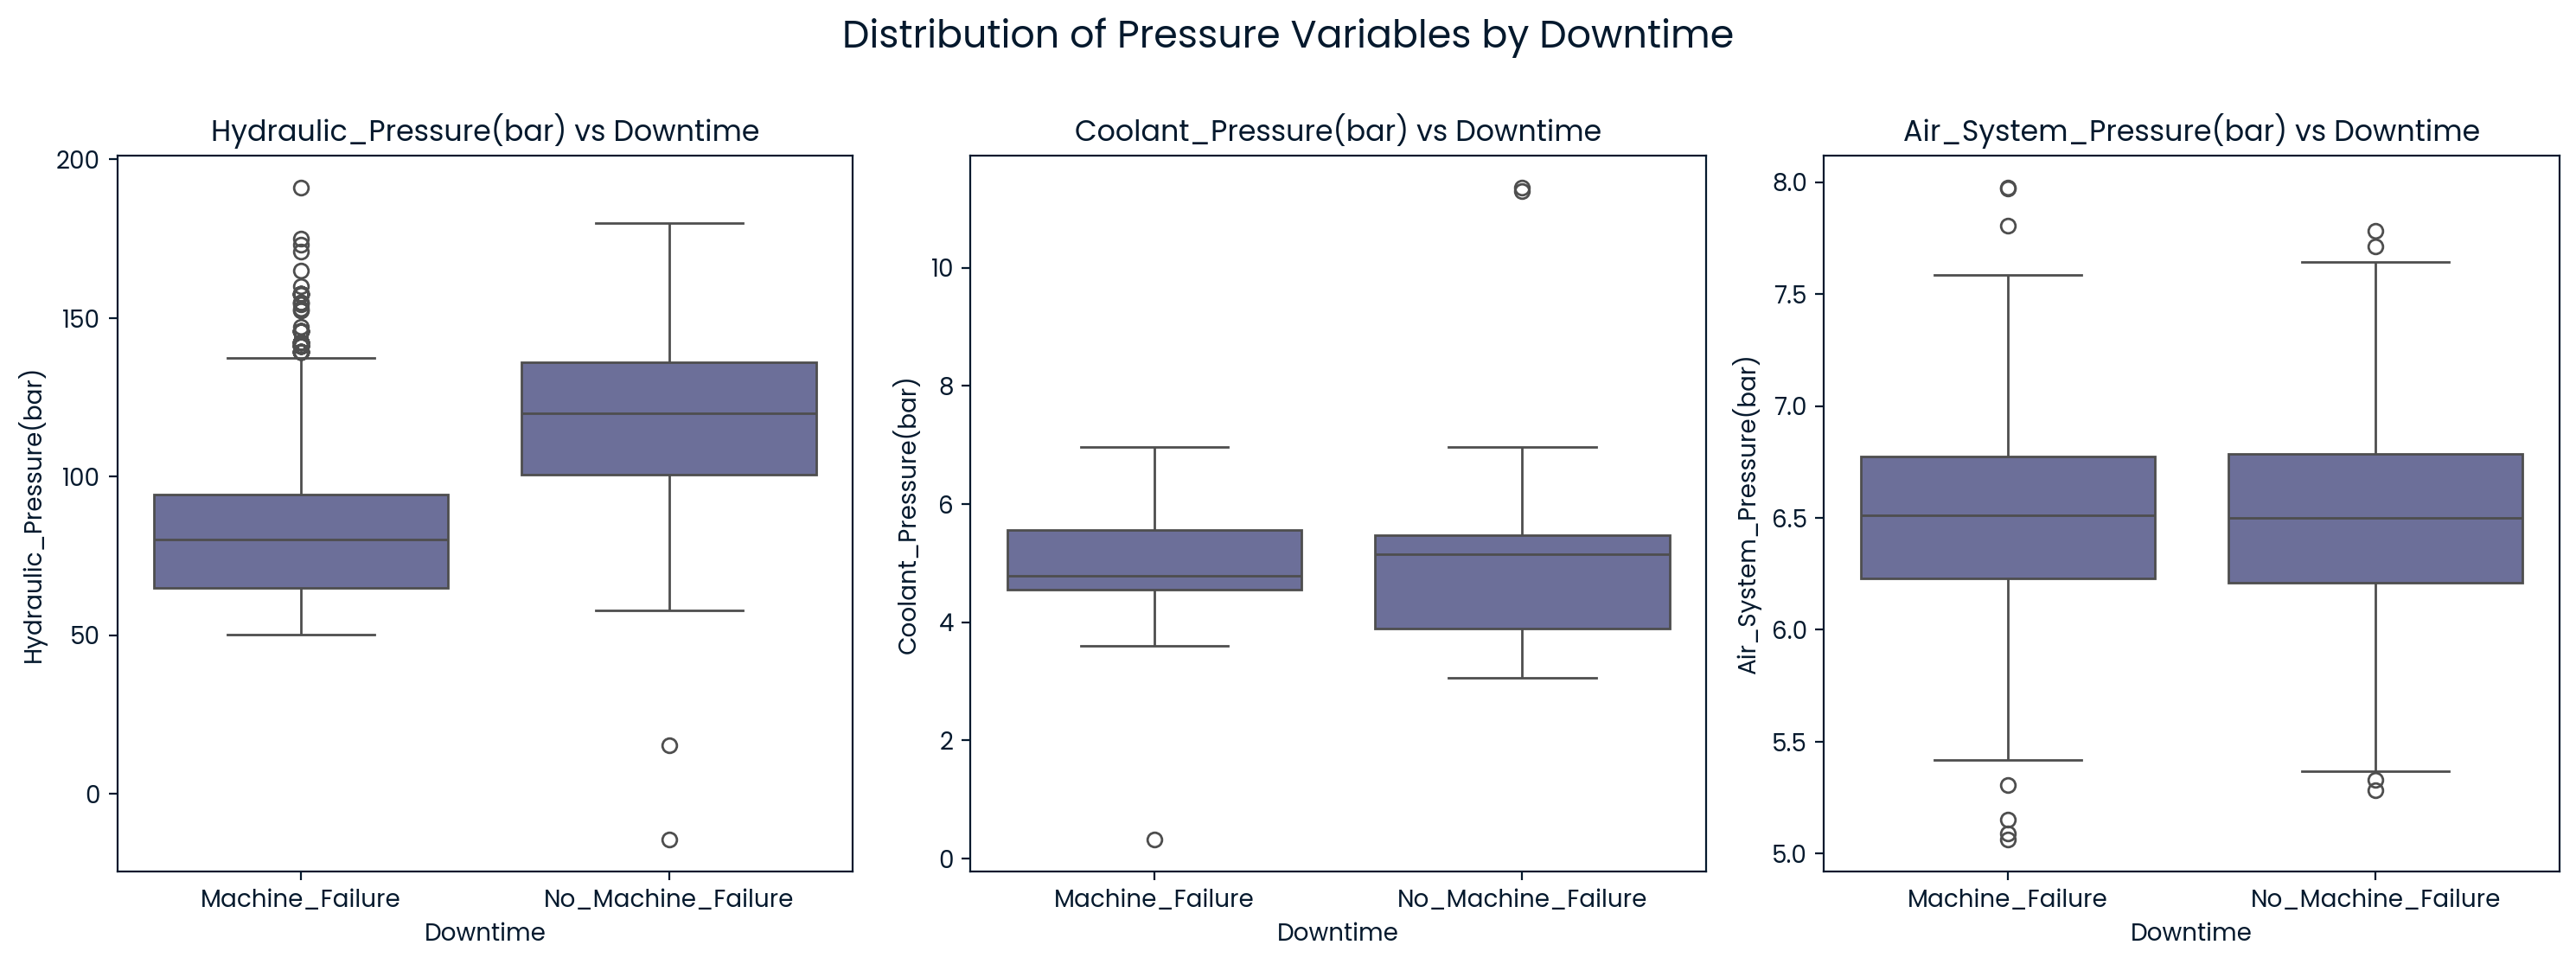

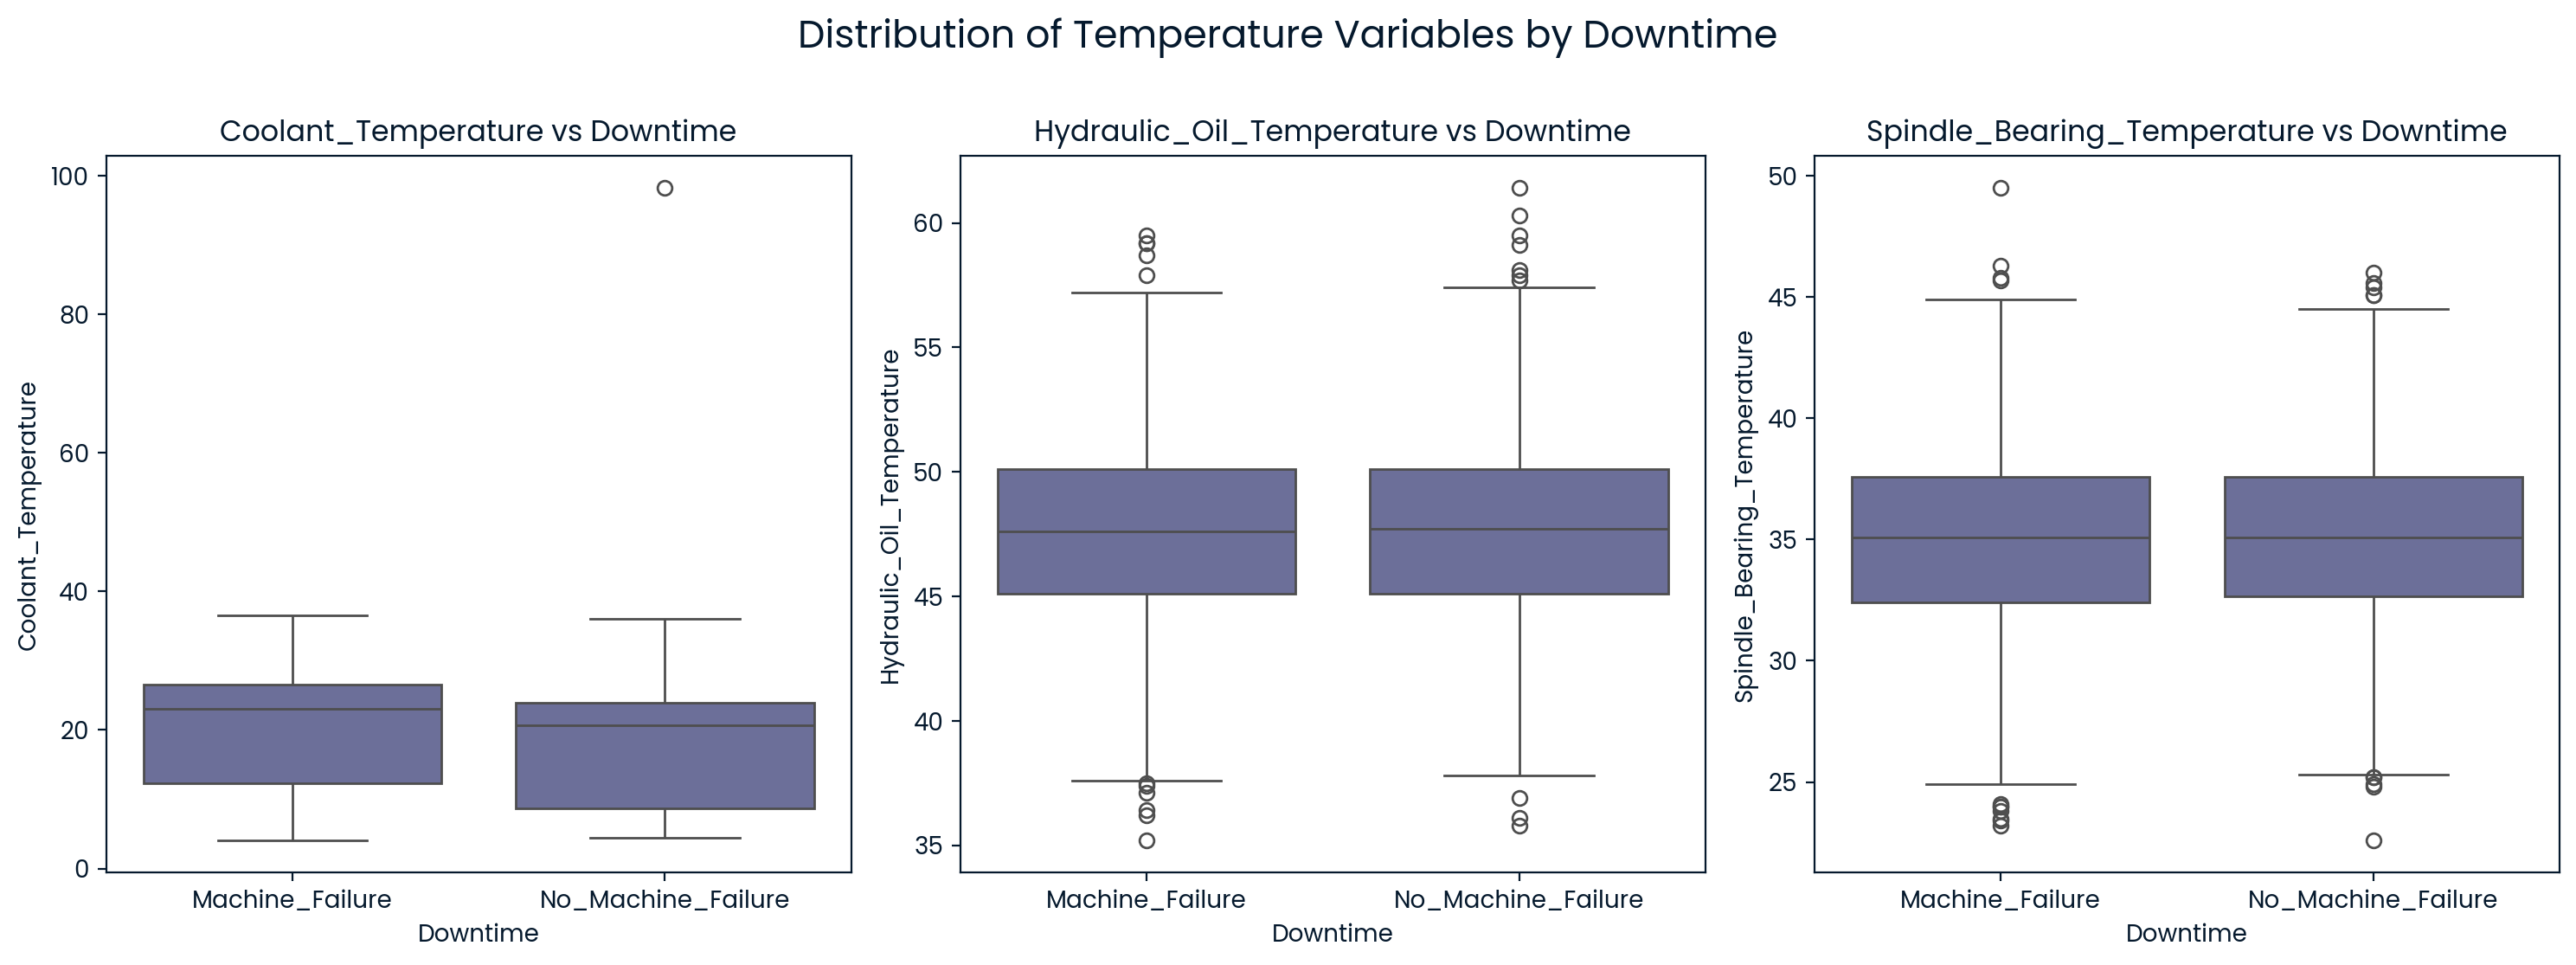

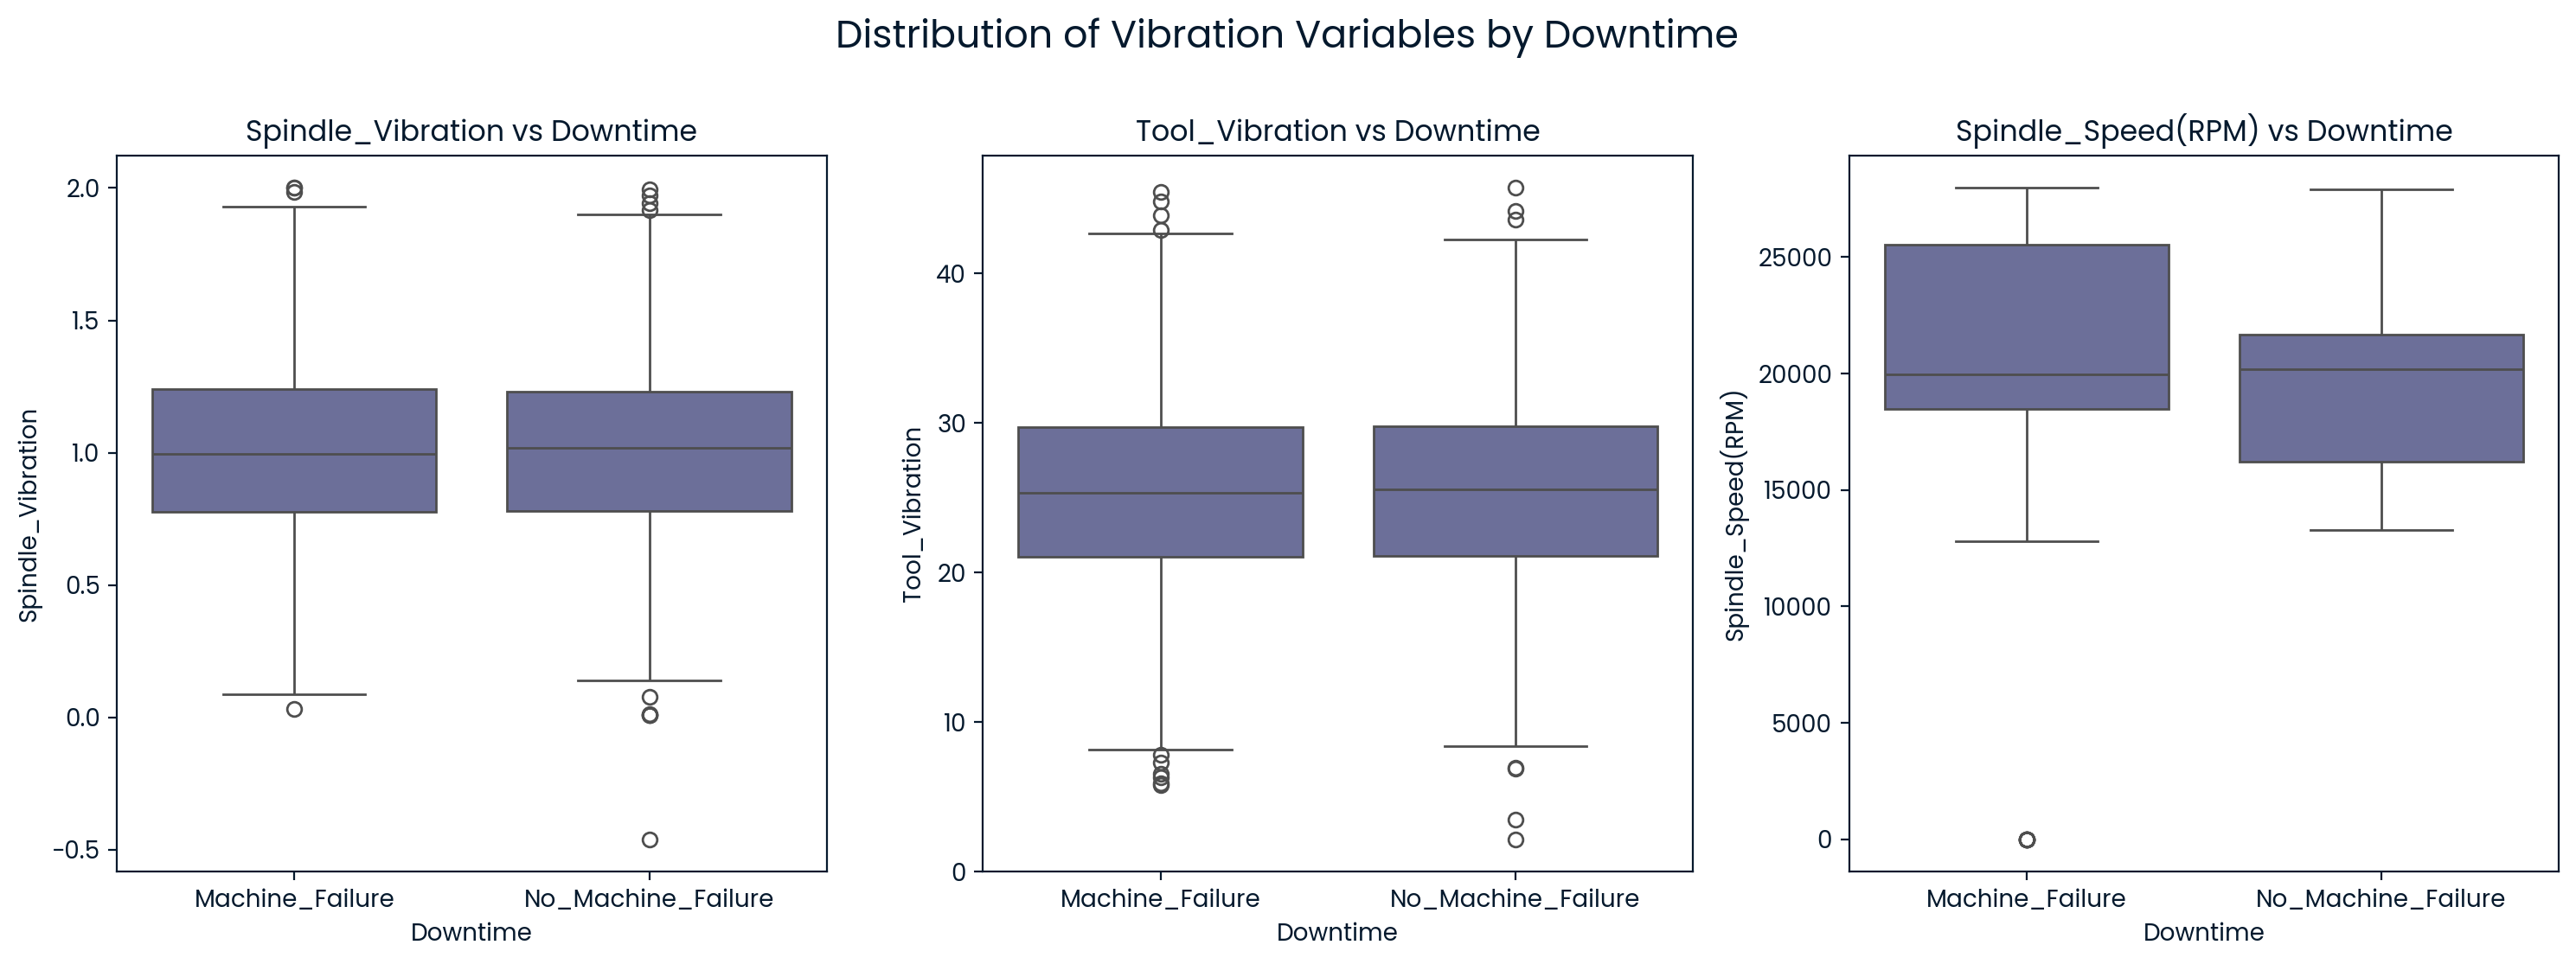

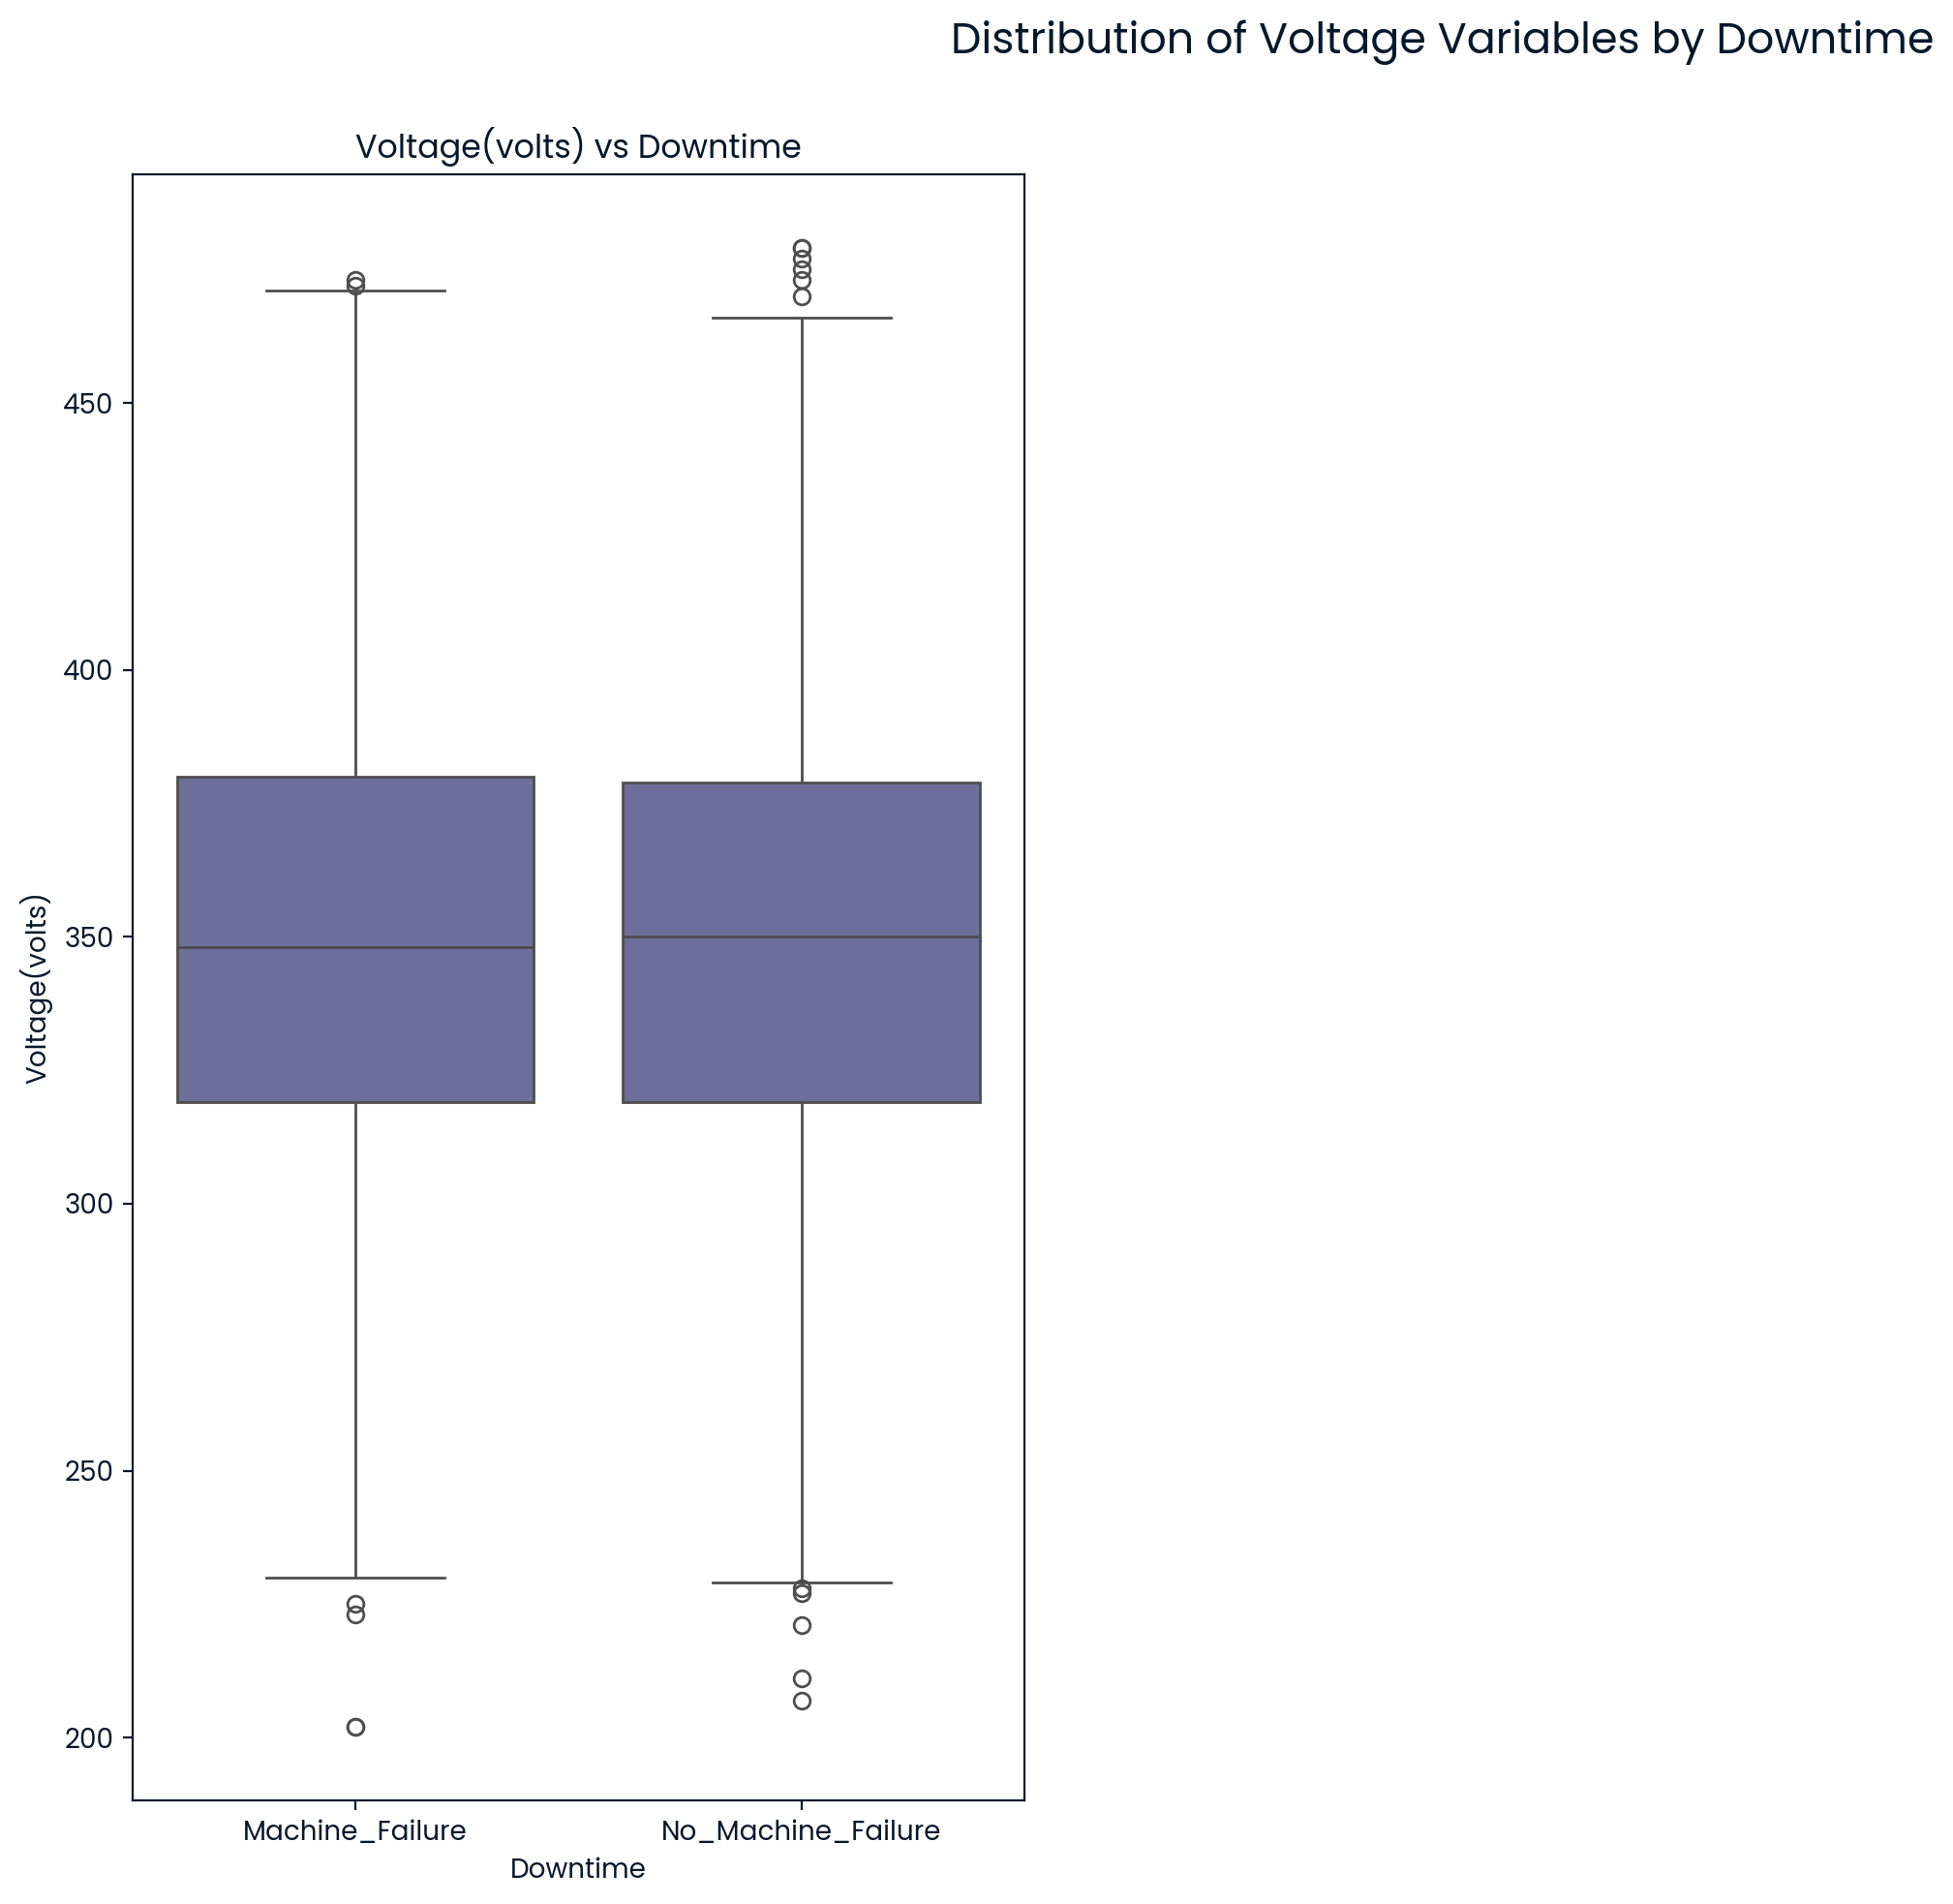

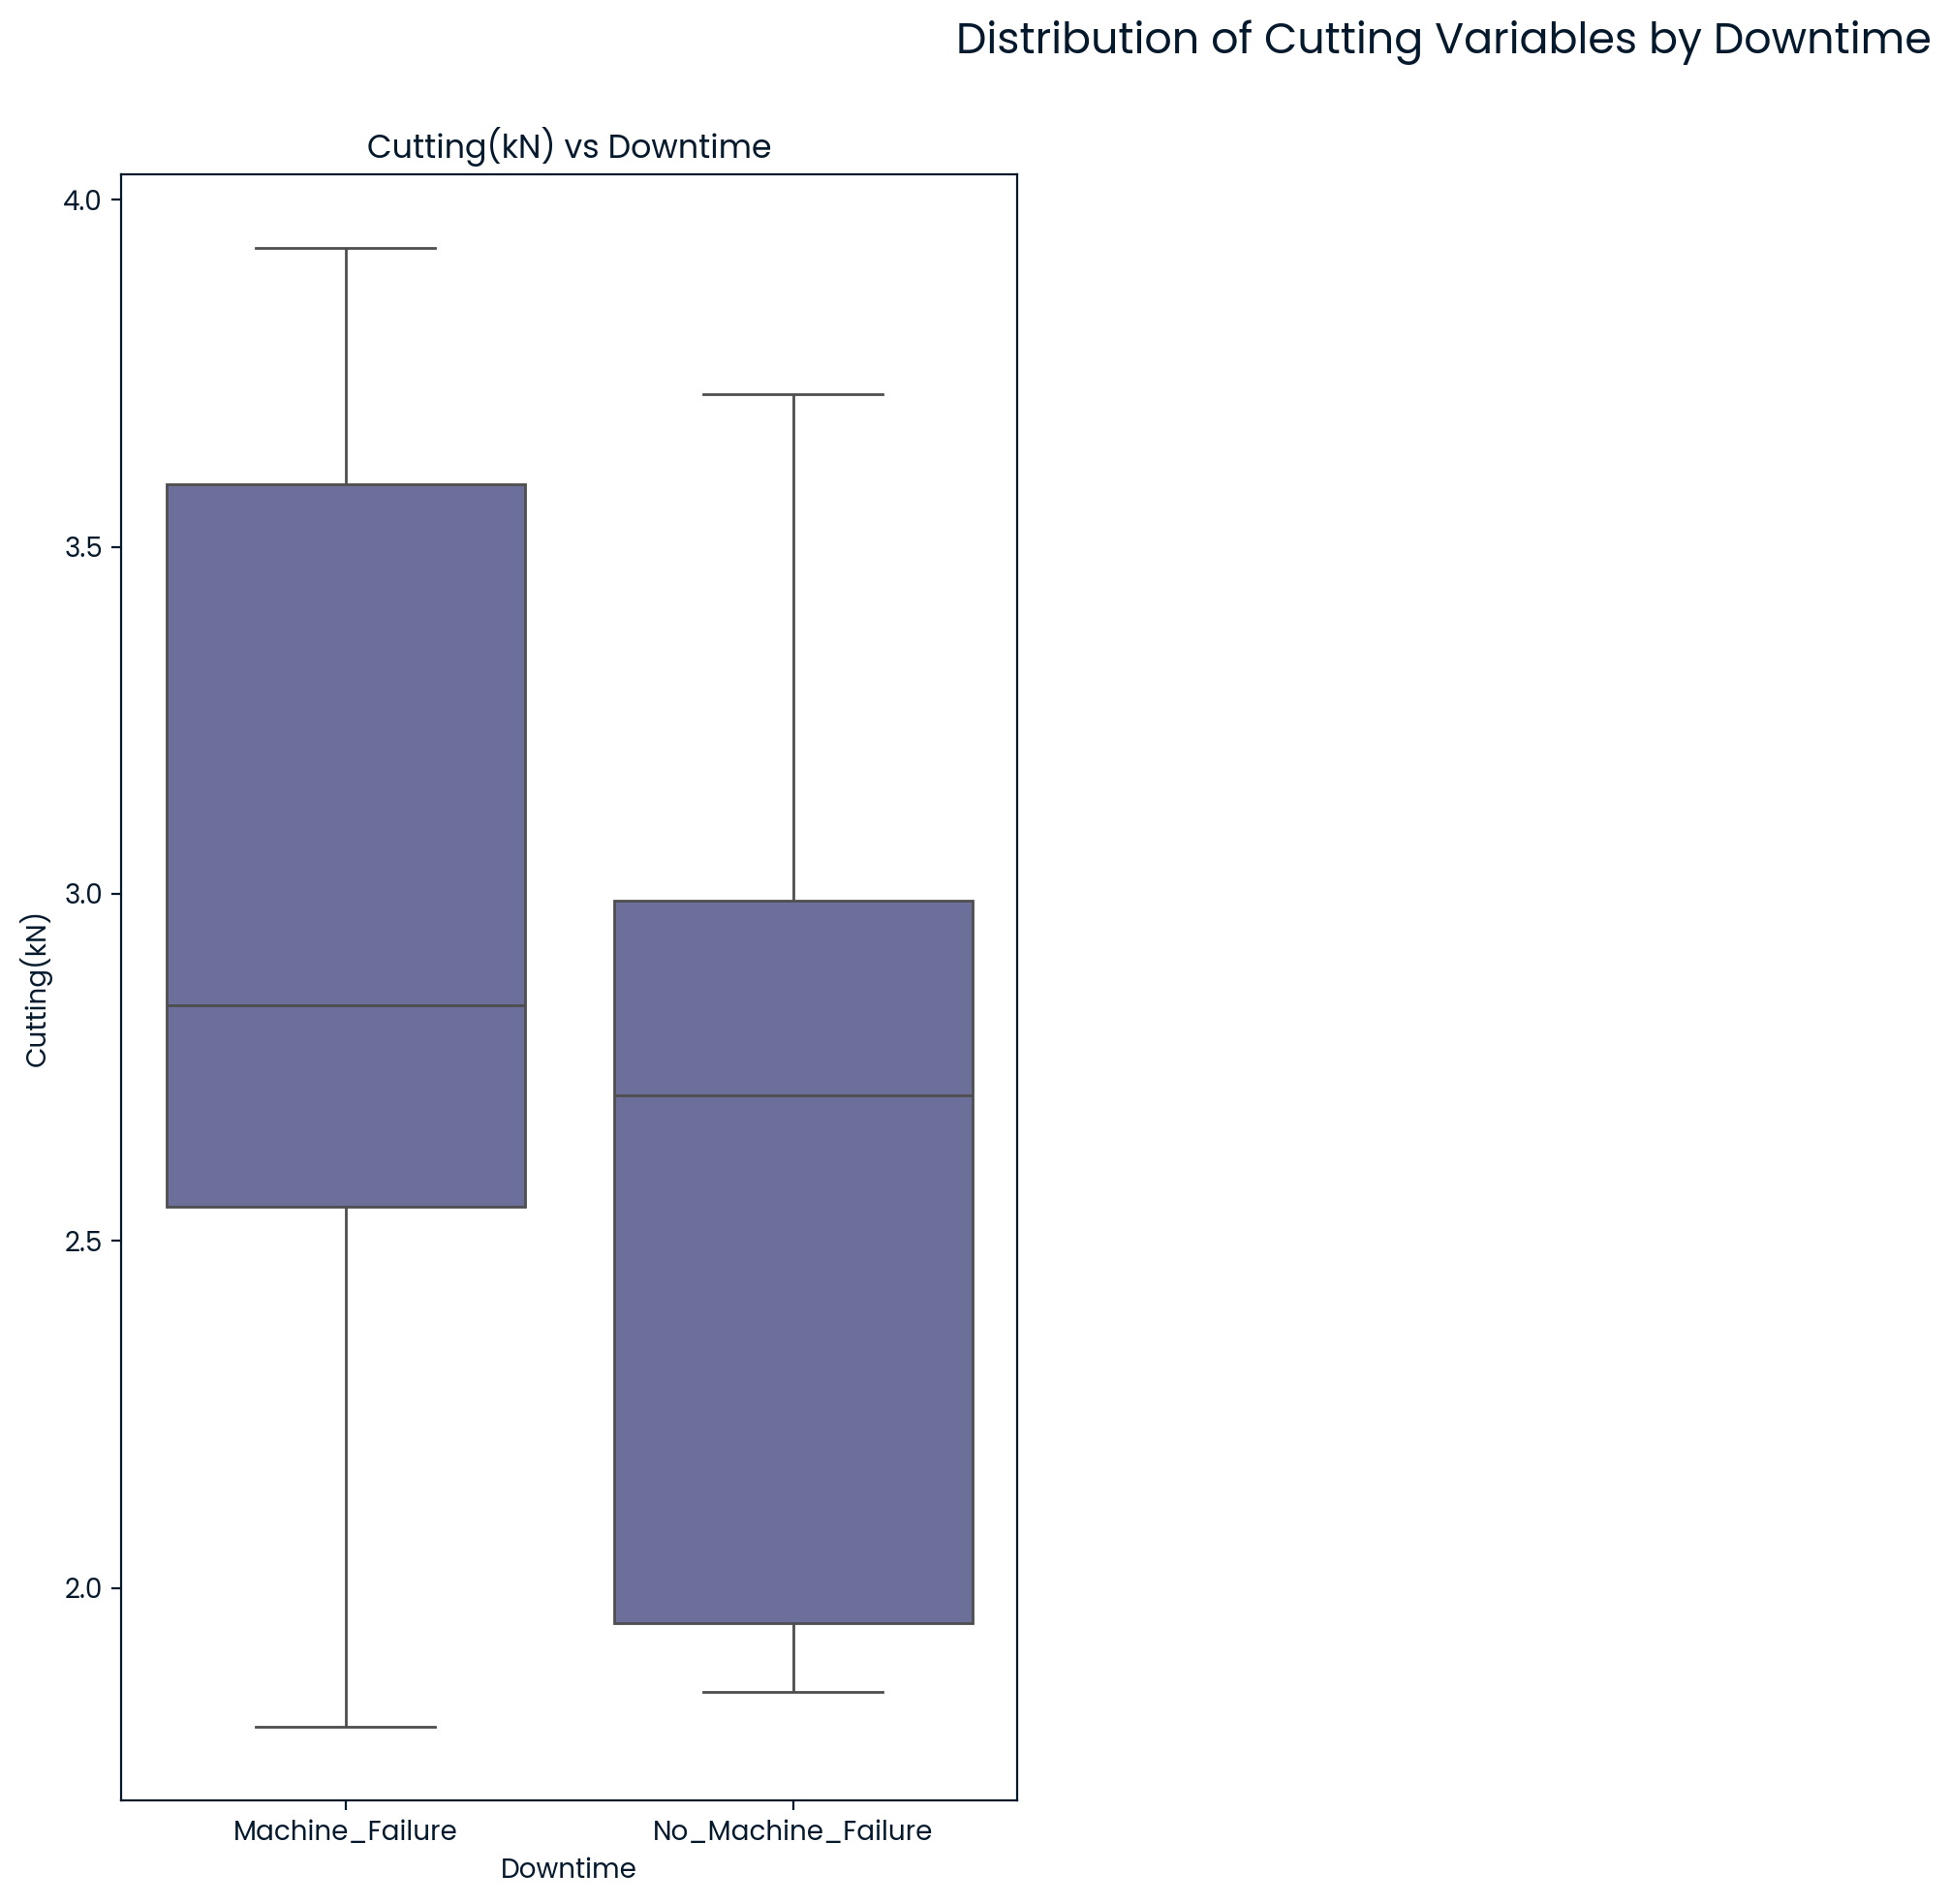

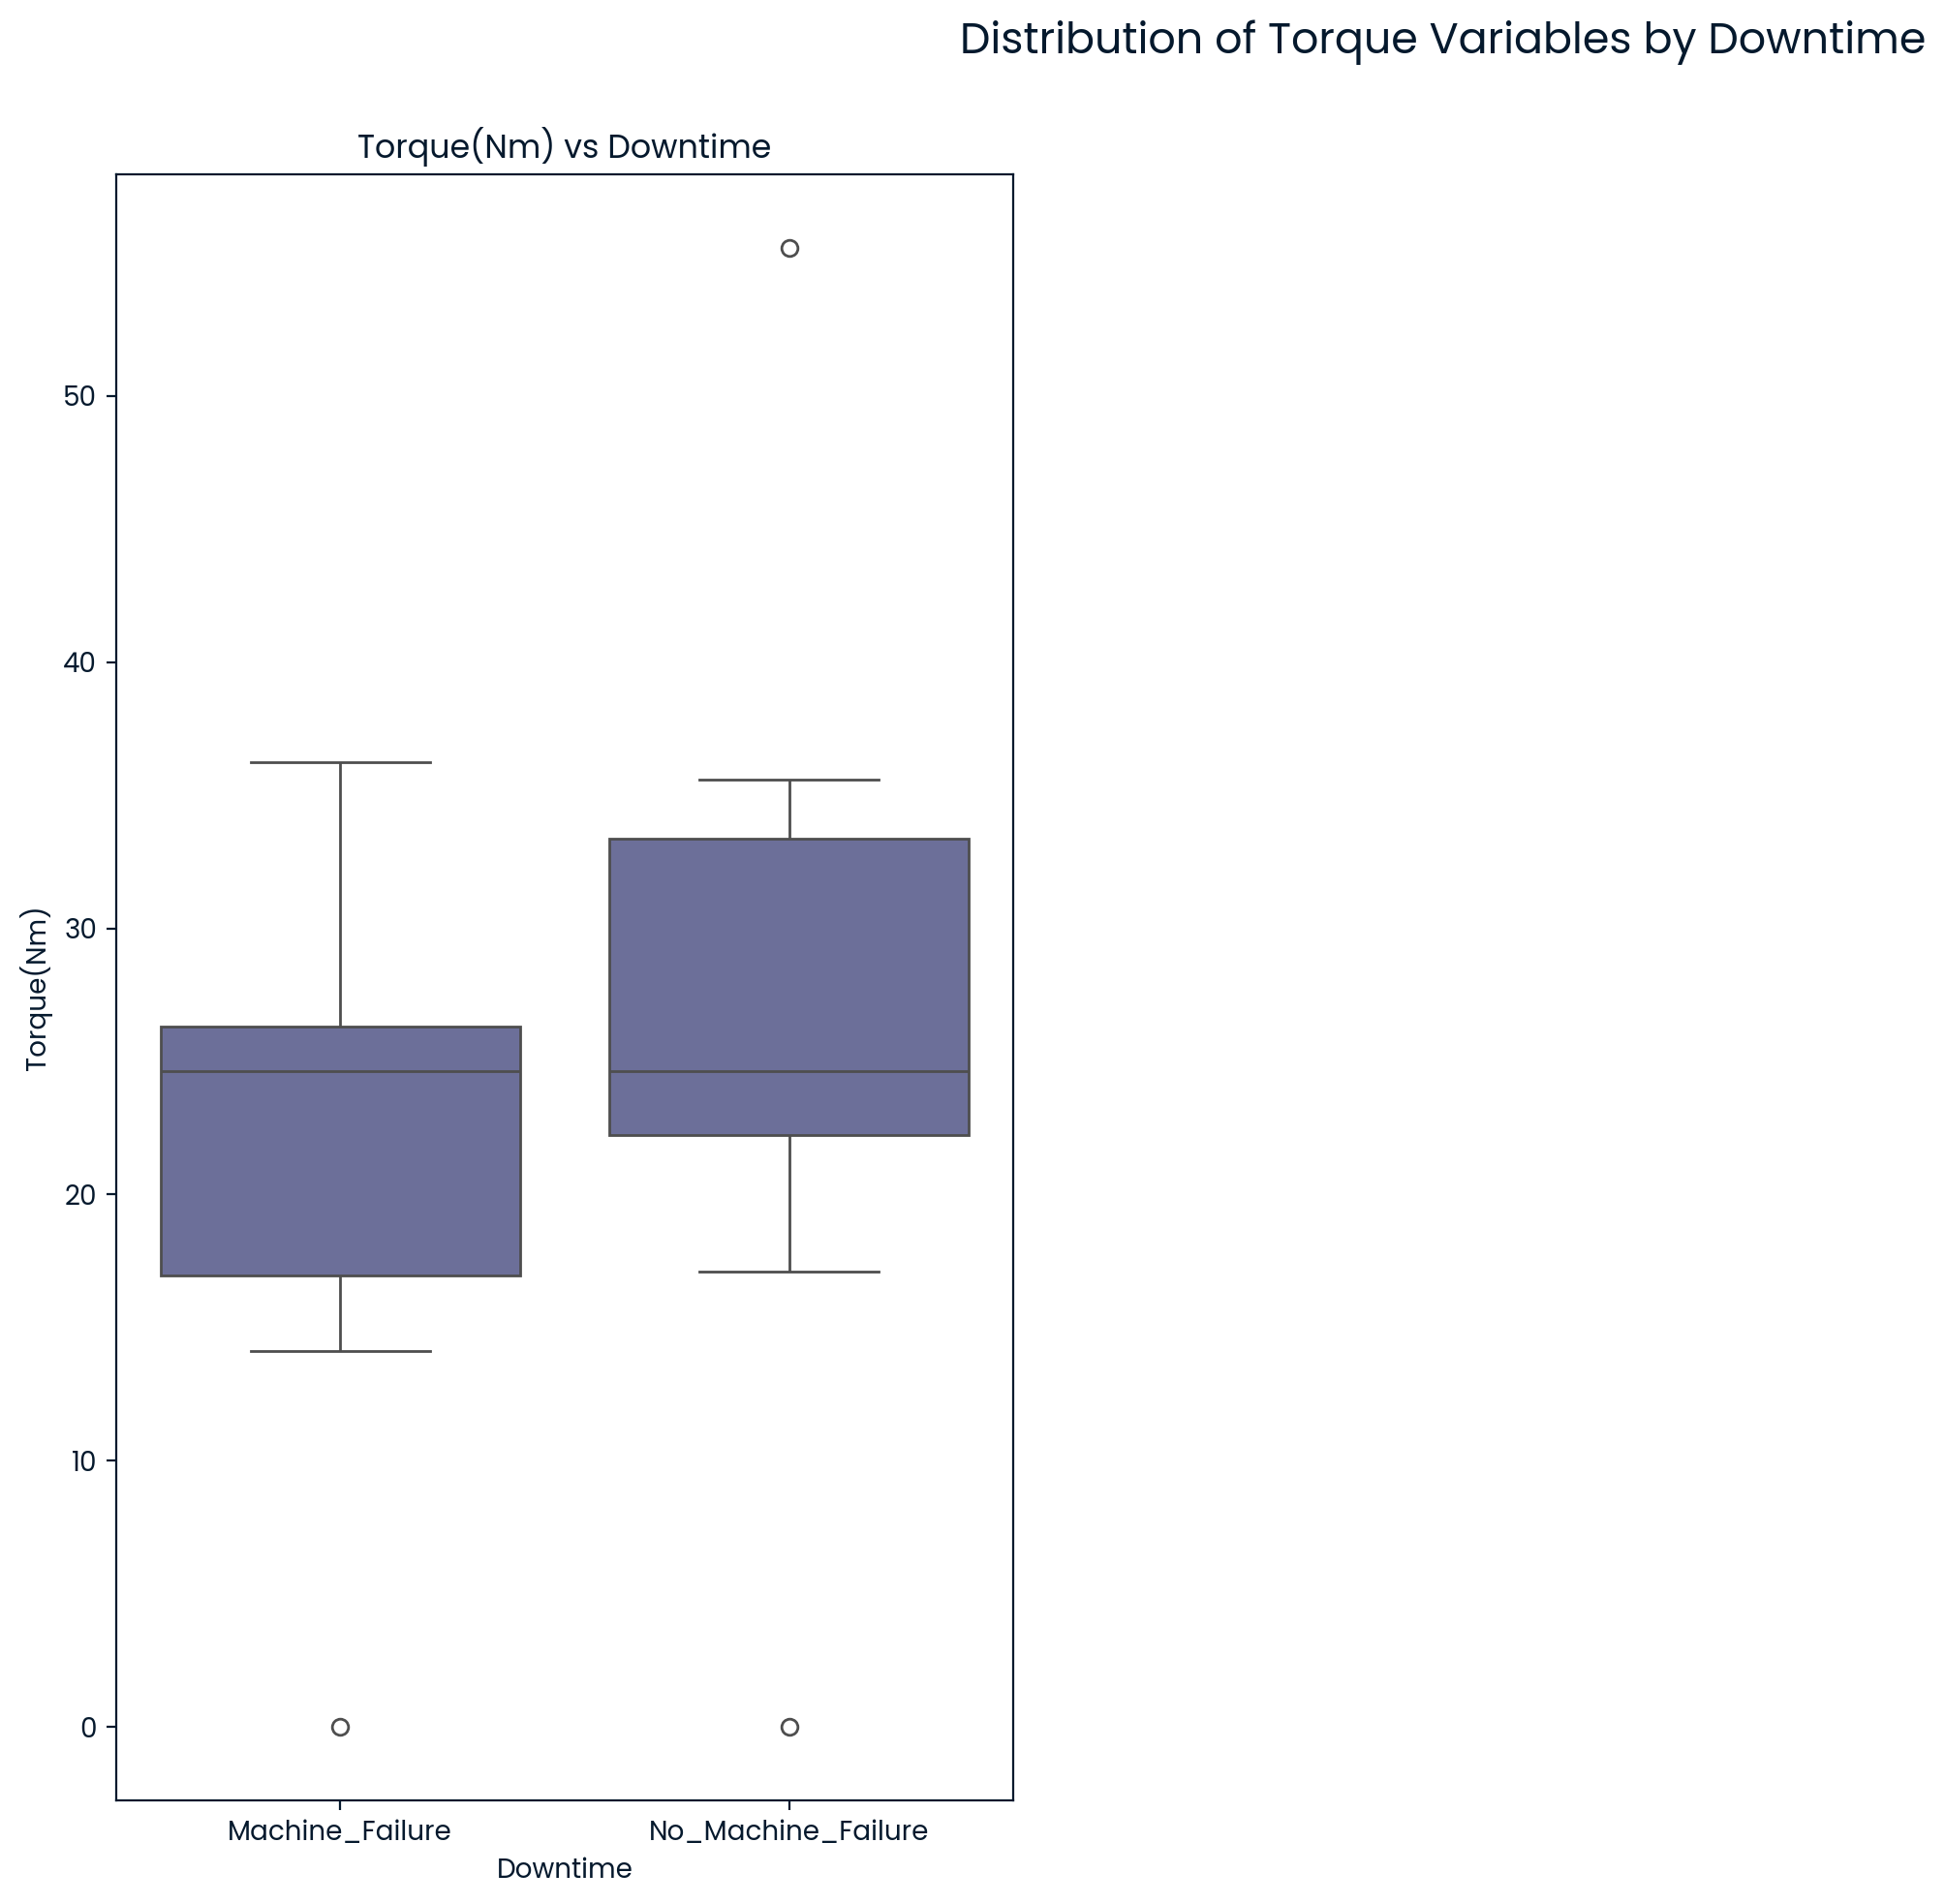

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define groups for different types of measurements
measurement_groups = {
    'Pressure': ["Hydraulic_Pressure(bar)", "Coolant_Pressure(bar)", "Air_System_Pressure(bar)"],
    'Temperature': ["Coolant_Temperature", "Hydraulic_Oil_Temperature", "Spindle_Bearing_Temperature"],
    'Vibration': ["Spindle_Vibration", "Tool_Vibration", "Spindle_Speed(RPM)"],
    'Voltage': ["Voltage(volts)"],
    'Cutting': ["Cutting(kN)"],
    'Torque': ["Torque(Nm)"]
}

# Function to create box plots for each group of measurements by Downtime status
def plot_boxplot(data, columns, title):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        plt.subplot(len(columns)//3 + 1, 3, i+1)
        sns.boxplot(x='Downtime', y=col, data=data)
        plt.title(f'{col} vs Downtime')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title spacing
    plt.show()

# Loop through each measurement group and create a plot
for group, columns in measurement_groups.items():
    plot_boxplot(downtime, columns, f'Distribution of {group} Variables by Downtime')

#### Results:

- **Hydraulic Pressure**: Machines with failures exhibit significantly lower hydraulic pressure compared to machines without failures.
- **Torque**: Machines with failures show slightly lower torque values, although the difference is not very pronounced.
- **Cutting Force**: The cutting force is marginally higher in machines with failures, but with more dispersion in the data.
- **Other Variables**: For the remaining variables, there are no visually significant differences between machines with failures and those without.



### Time Series Analysis

This analysis helps uncover trends and seasonal patterns in failures, enabling preventive maintenance and improving operational efficiency.

In [6]:
# Convert the 'Date' column to datetime format
downtime['Date'] = pd.to_datetime(downtime['Date'])

# Create new columns derived from date
downtime['Year'] = downtime['Date'].dt.year
downtime['Month'] = downtime['Date'].dt.month
downtime['Day_of_Week'] = downtime['Date'].dt.day_name() # Name of the day
downtime['Day_of_month'] = downtime['Date'].dt.day

# Convert 'Downtime' to binary (0 or 1) if it is not
downtime['Downtime (bn)'] = downtime['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)

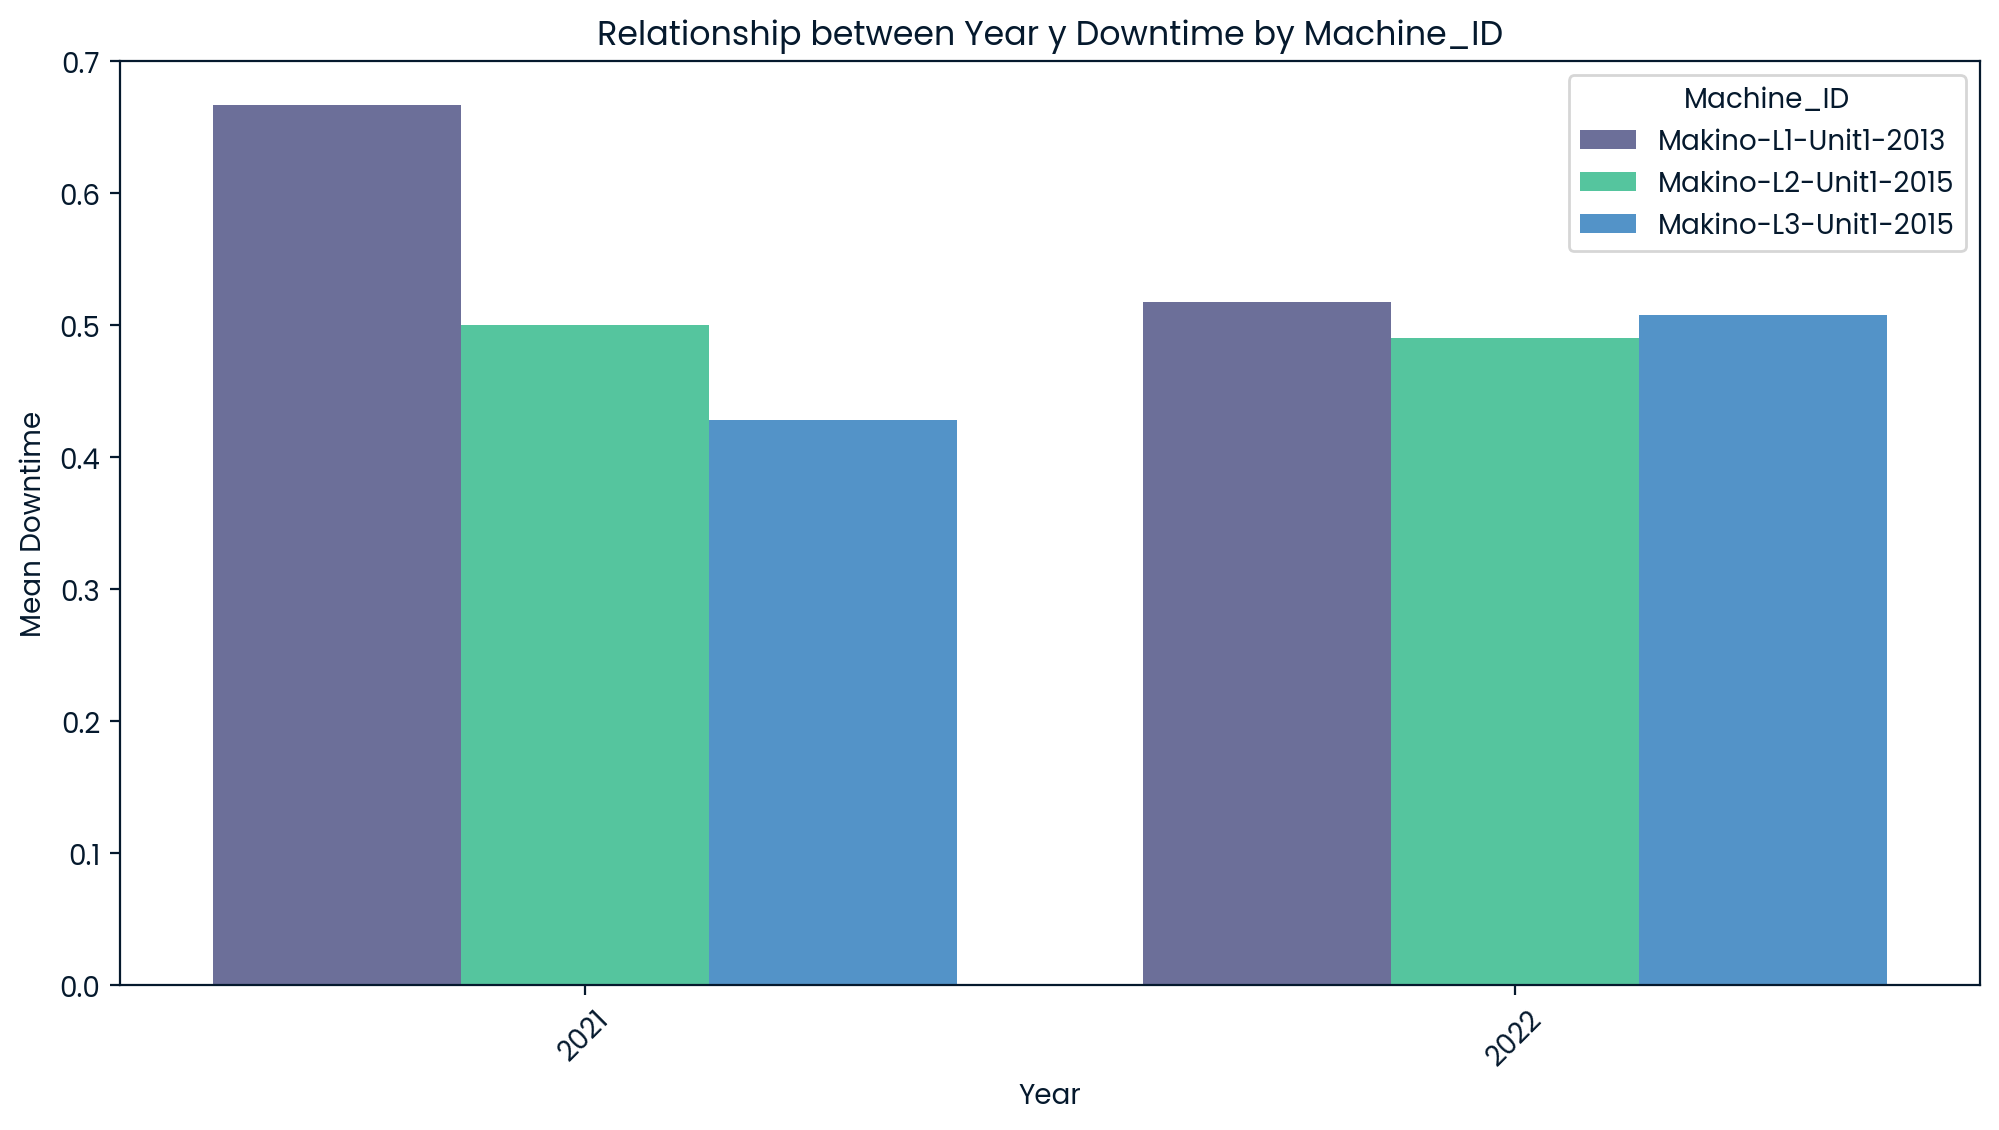

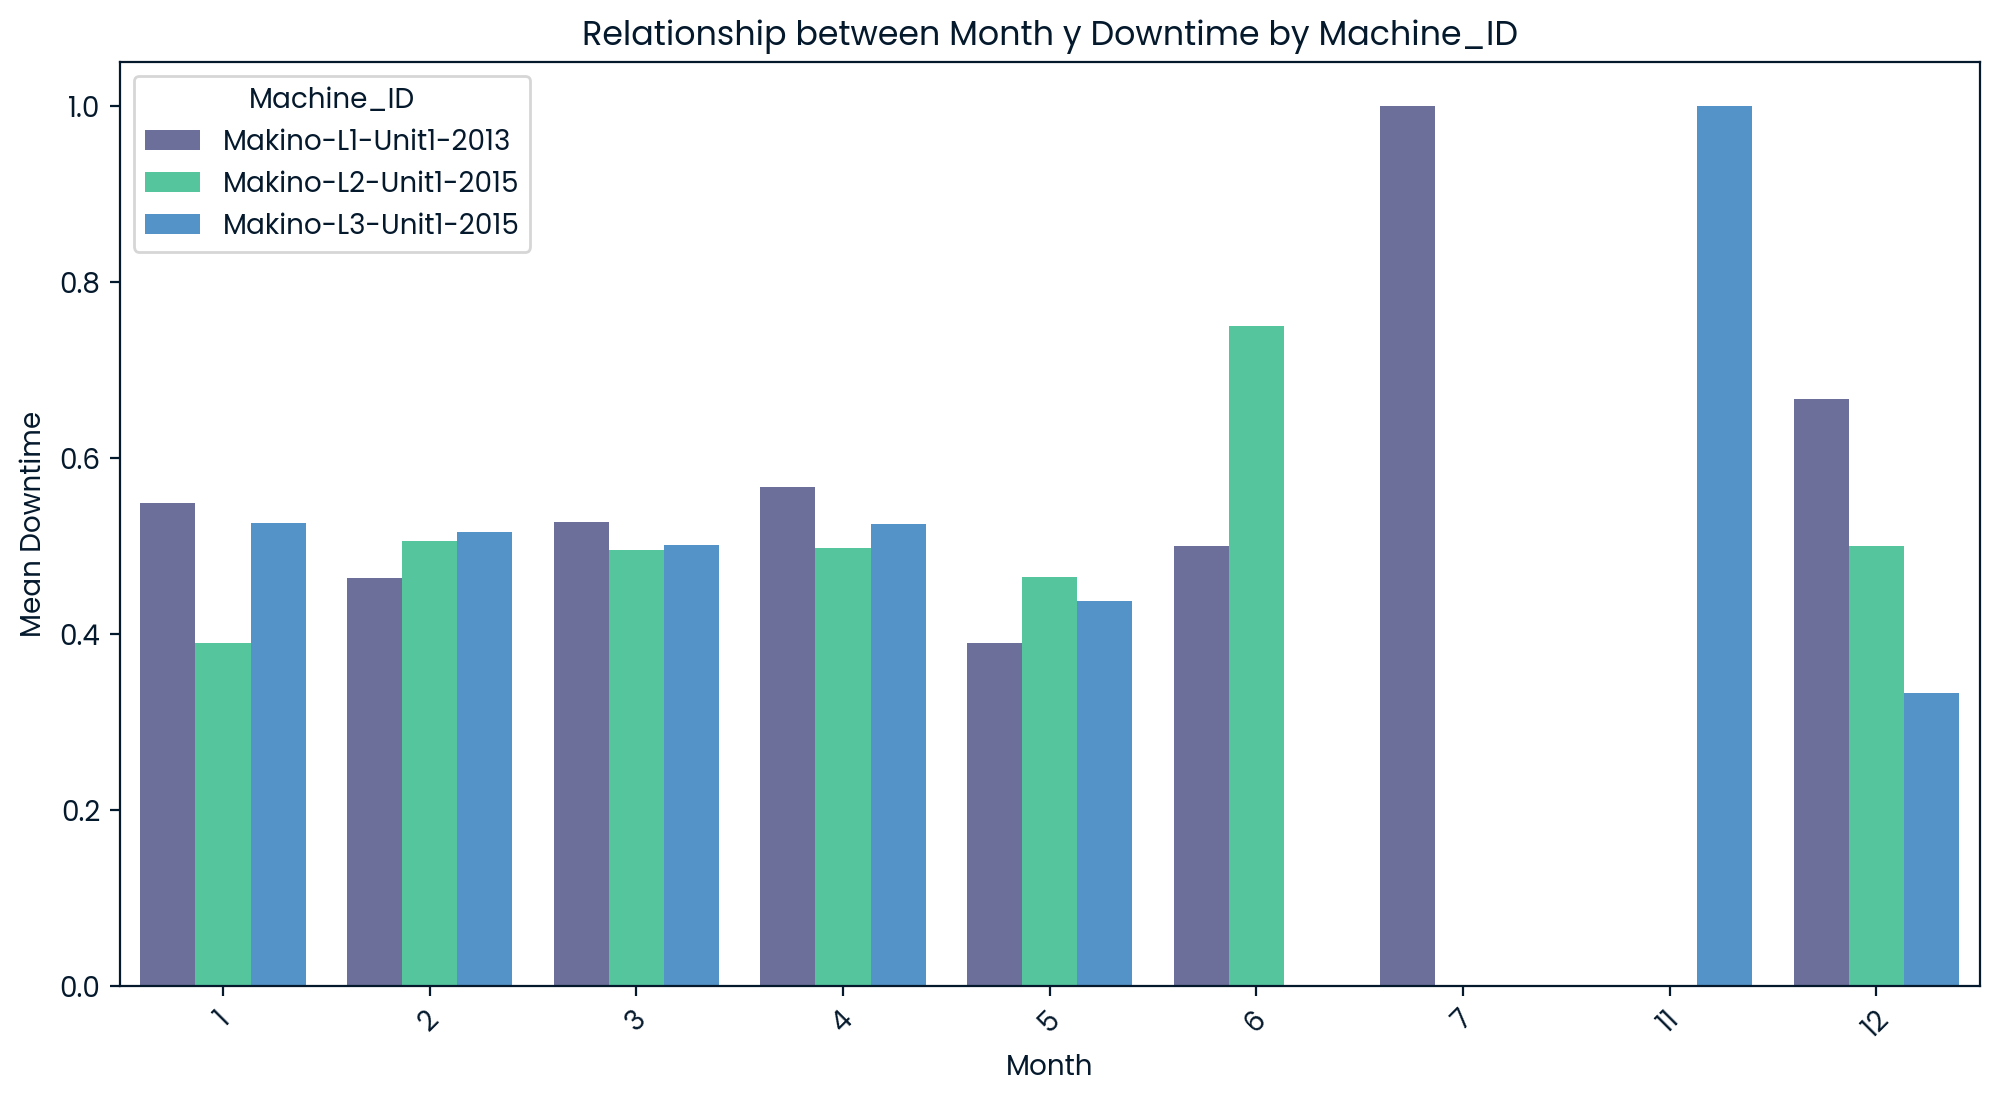

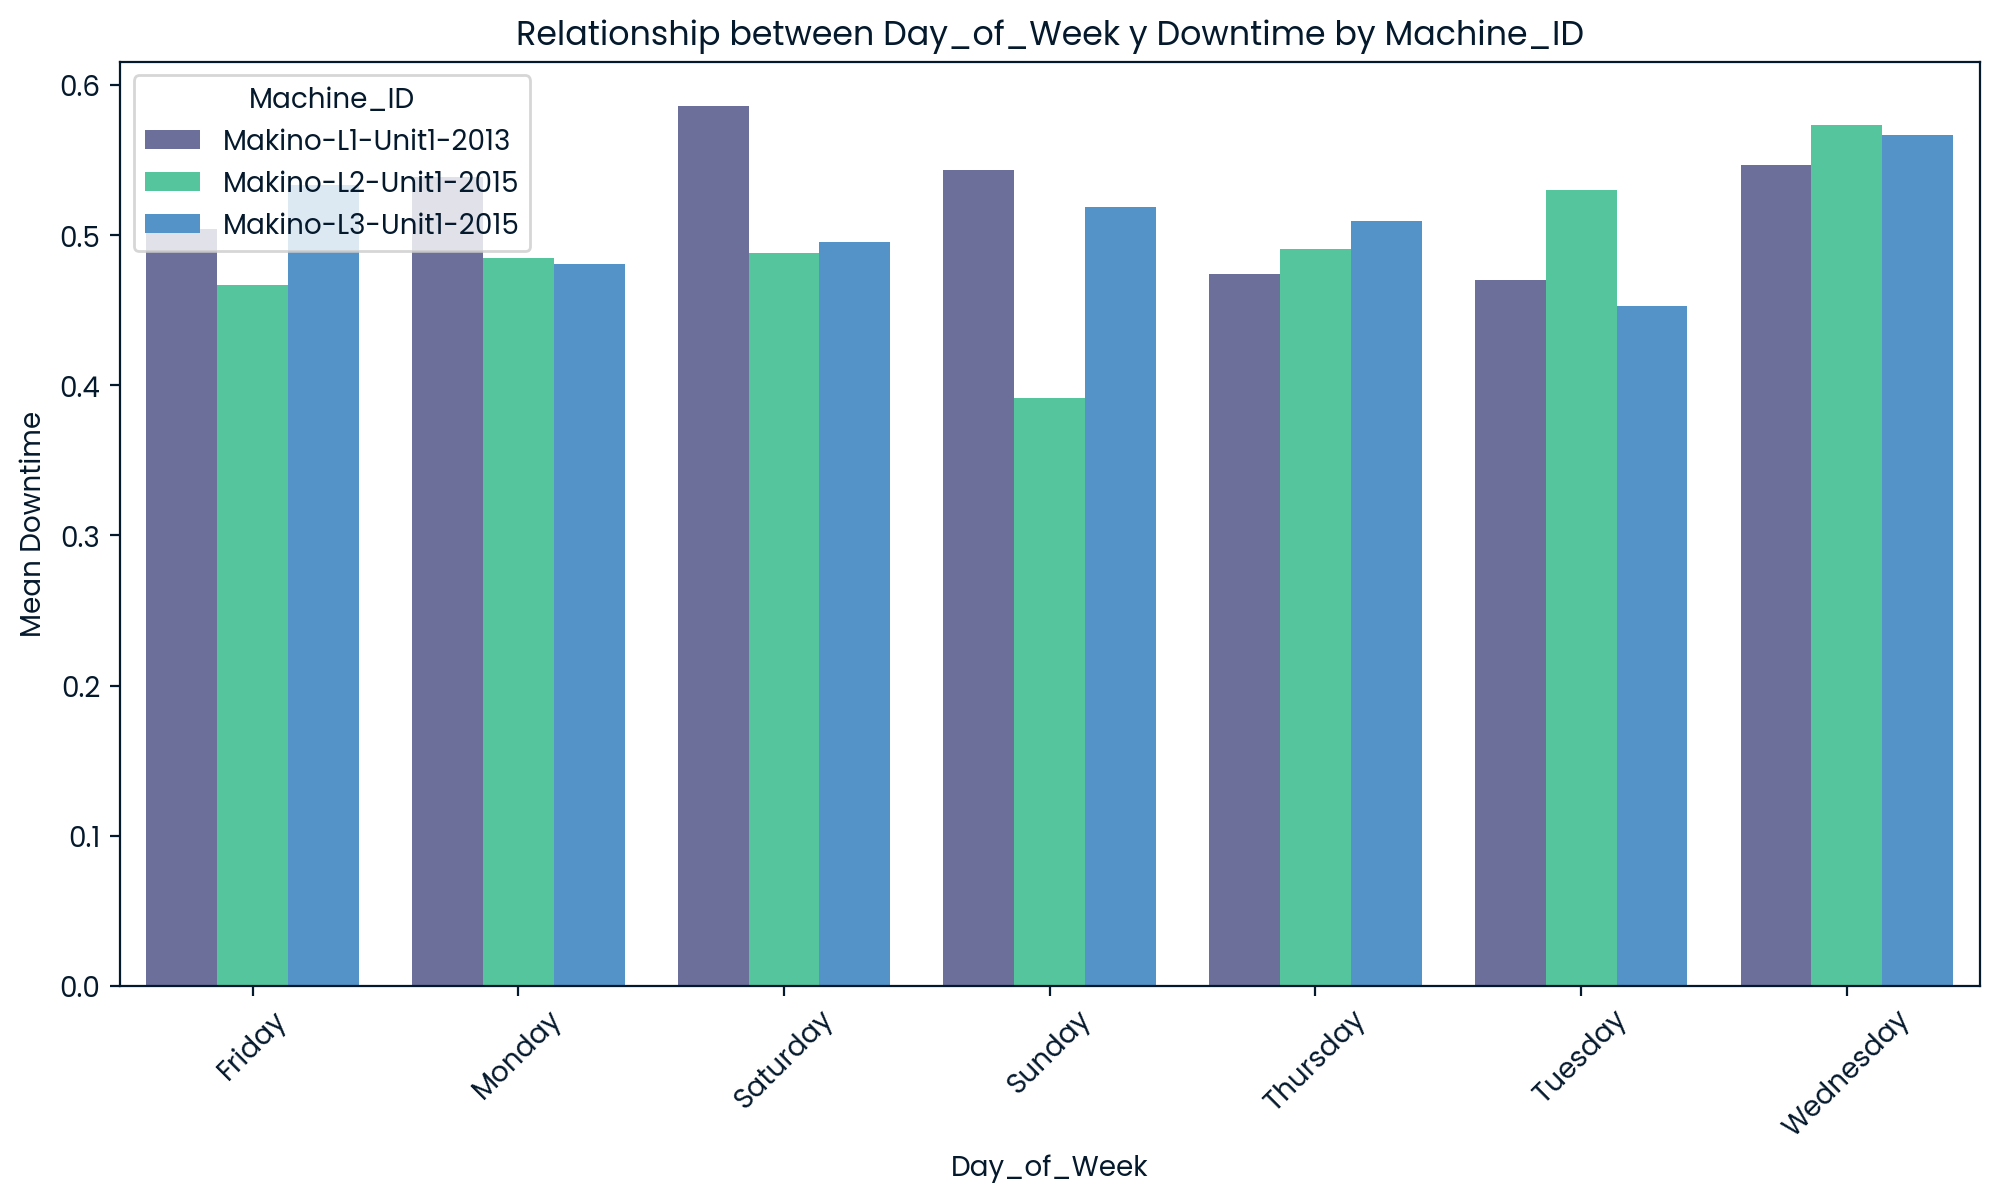

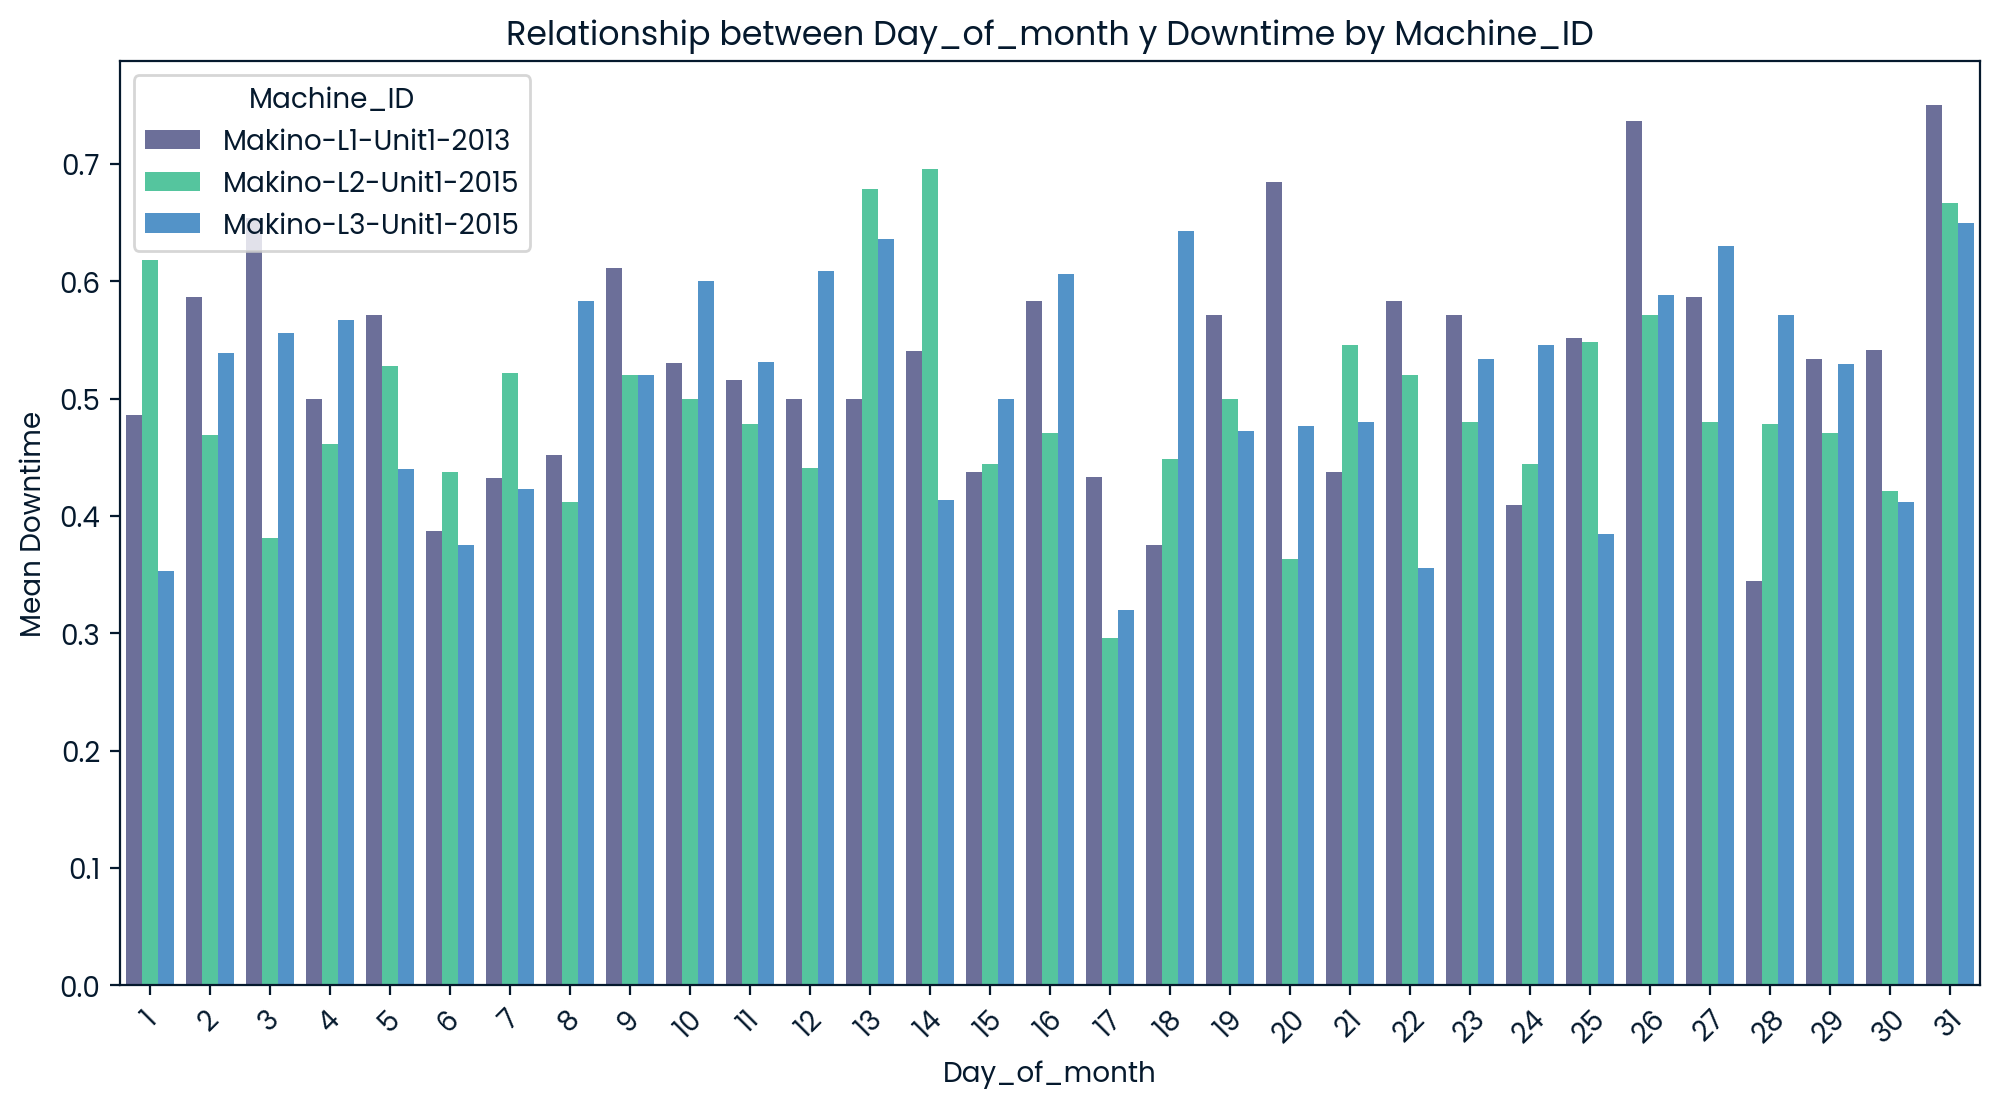

In [7]:
# Calculate the relative frequency of Downtime for each new column and Machine_ID
columns_to_analyze = ['Year', 'Month', 'Day_of_Week', 'Day_of_month']
for col in columns_to_analyze:
    grouped = downtime.groupby([col, 'Machine_ID'])['Downtime (bn)'].mean().reset_index()
    
   # Create visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped, x=col, y='Downtime (bn)', hue='Machine_ID')
    plt.title(f'Relationship between {col} y Downtime by Machine_ID')
    plt.xticks(rotation=45)
    plt.ylabel('Mean Downtime')
    plt.show()

#### Results of the Time Series Analysis

**Yearly Analysis**:
 - In 2021, machine failures were highly divergent:
 - L1: ~67%
 - L2: ~50%
 - L3: ~43%
 - In 2022, failure rates converged, with all machines around ~50%, consistent with previous findings.

**Monthly Analysis**:
 - Divergence is notable in January, June, July, November, and December.
 - No data is available for August, September, and October.

**Weekly Analysis**:
 - Sundays show significant divergence, while wenesday have the highest failure prevalence.
 - L1 exhibits consistently higher failure rates on certain days.

**Within-Month Analysis**:
 - Failure rates display a cyclical pattern, rising and falling throughout the month.
 - End-of-month failures are particularly frequent.

### Analysis of Significant Variable Interactions

It is important to go a little deeper and analyze the interaction of several independent variables in the target variable. Visually, we will take pairs of variables that we consider to have a technical relationship and that also had significant differences in the univariate analysis regarding the state of the machine.

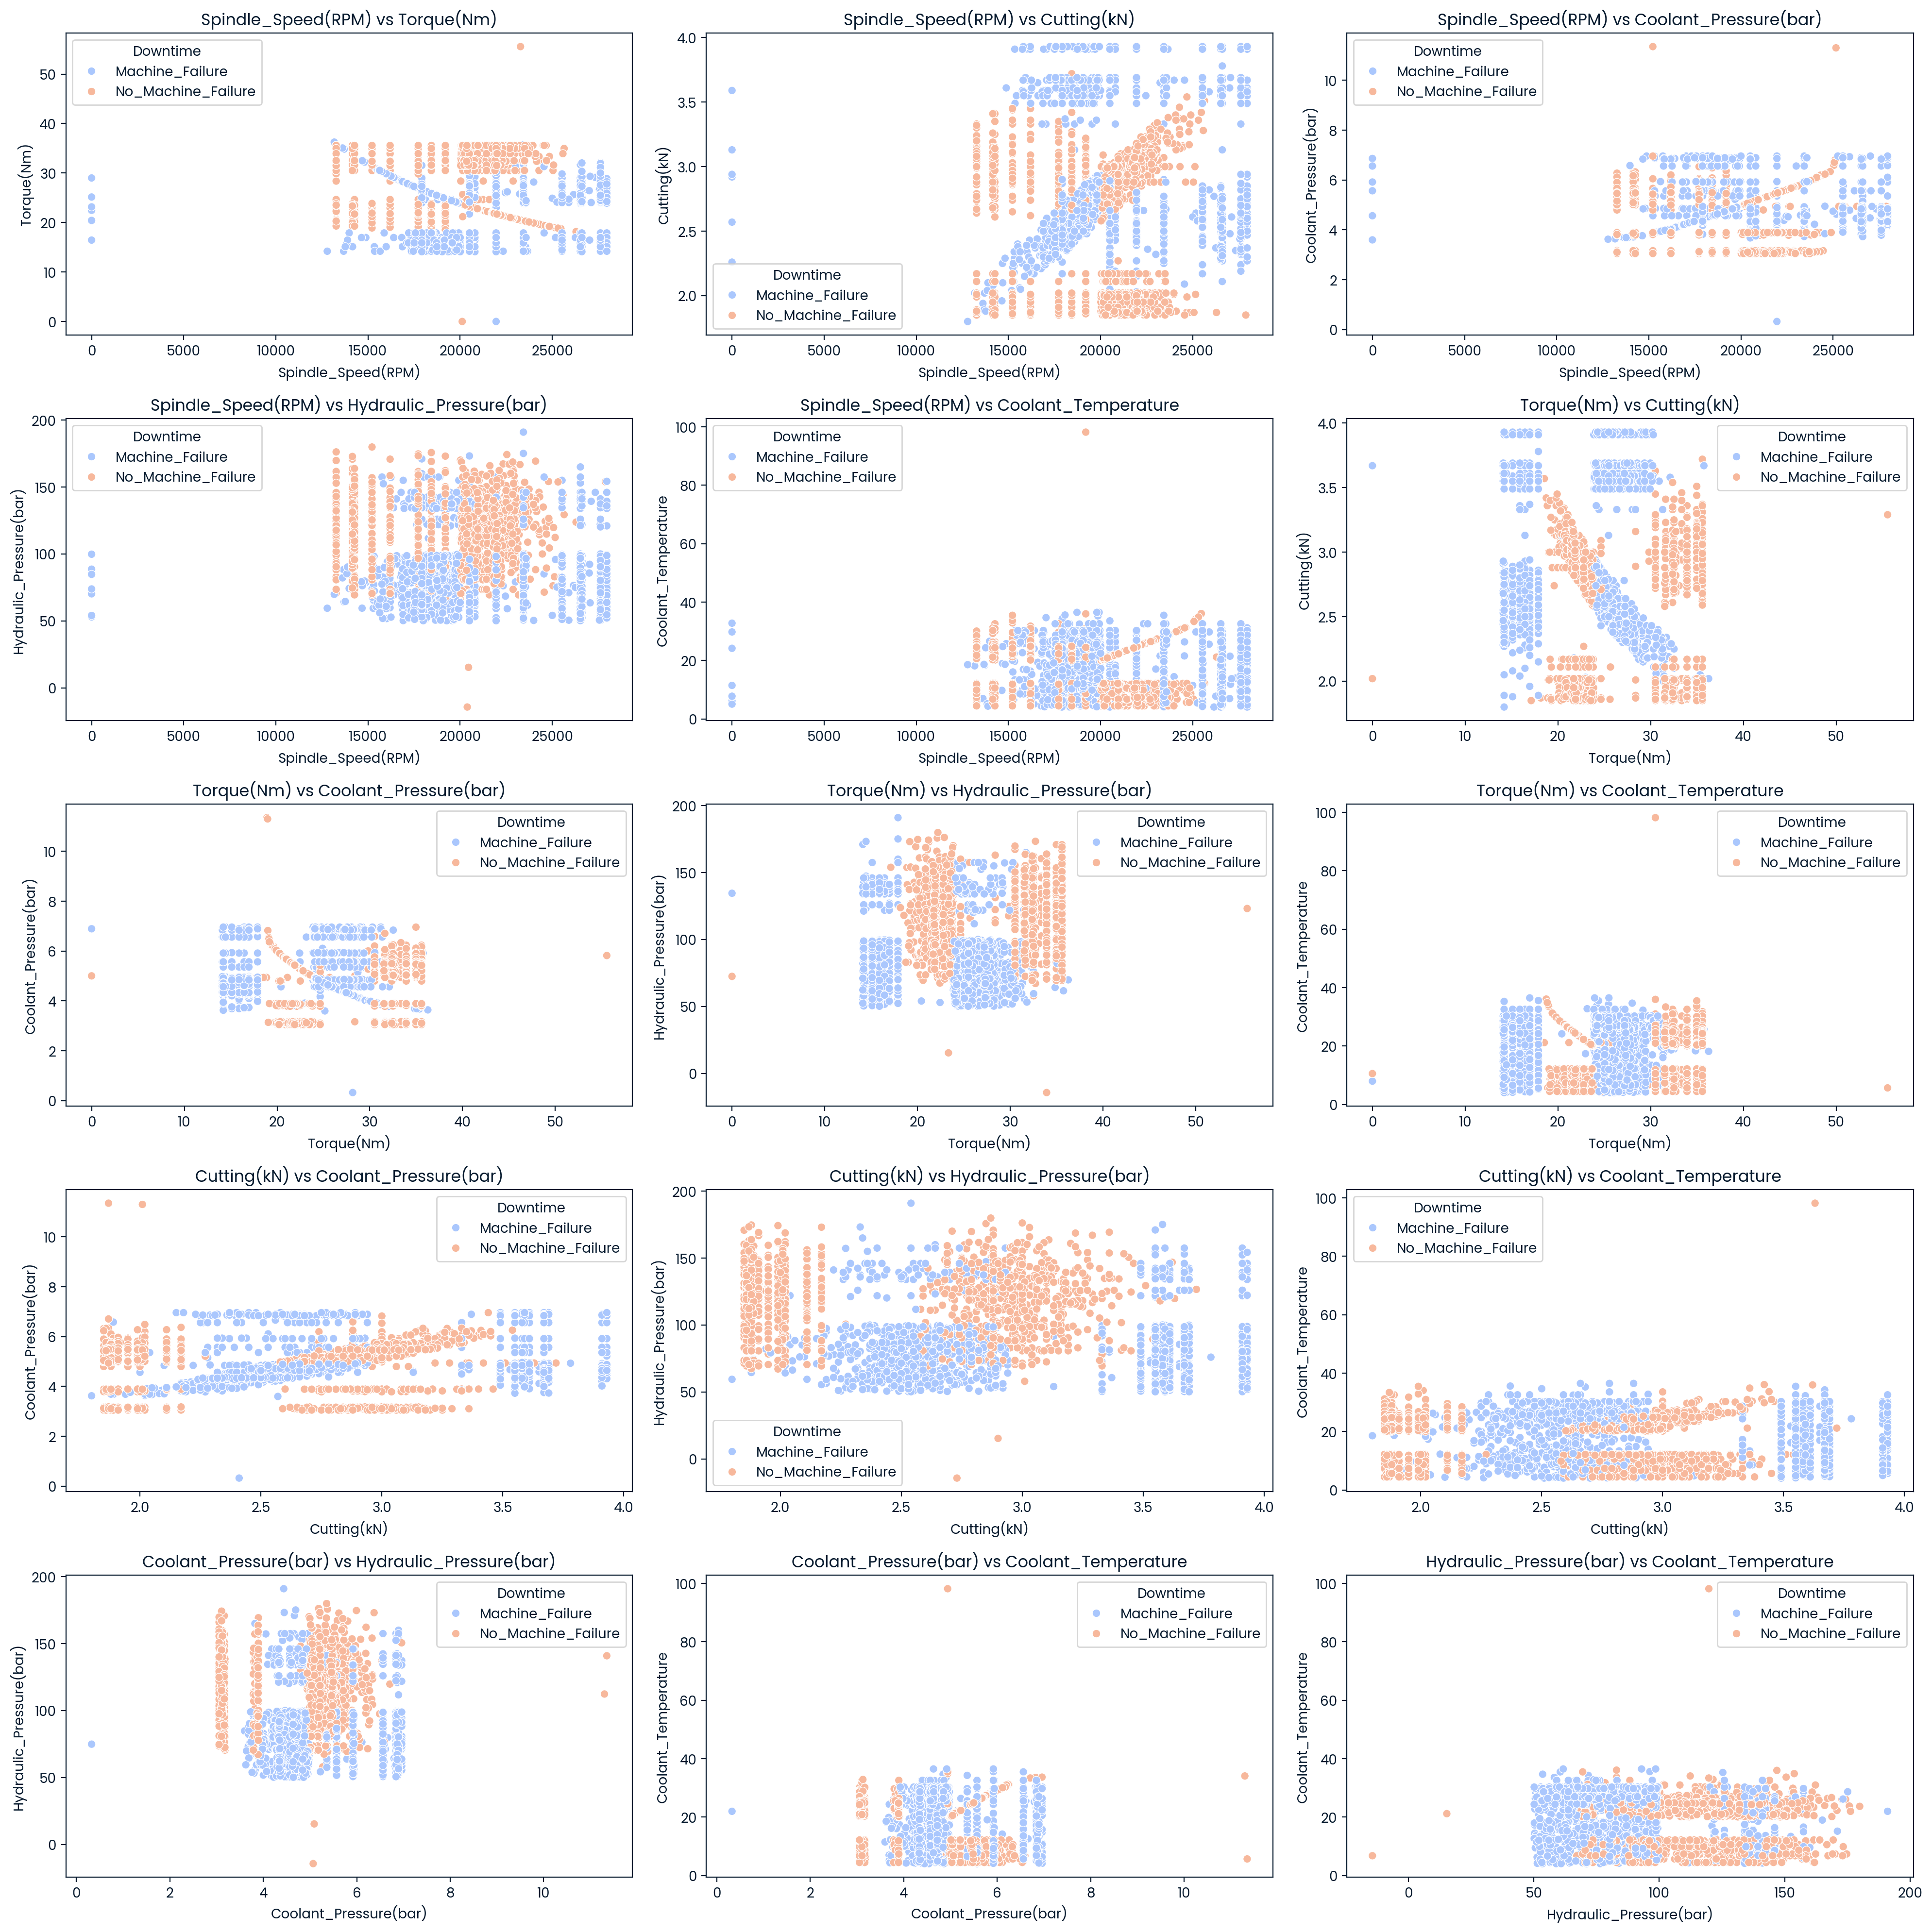

In [8]:
from itertools import combinations

# Define the variables to analyze
variables = [
    "Spindle_Speed(RPM)", 
    "Torque(Nm)", 
    "Cutting(kN)", 
    "Coolant_Pressure(bar)", 
    "Hydraulic_Pressure(bar)", 
    "Coolant_Temperature"
]

# Generate all combinations of pairs
variable_combinations = list(combinations(variables, 2))

# Create scatter plots for each pair
plt.figure(figsize=(20, 20))

for i, (var1, var2) in enumerate(variable_combinations, 1):
    plt.subplot(5, 3, i)  # Arrange plots in a 5x3 grid
    sns.scatterplot(data=downtime, x=var1, y=var2, hue="Downtime", palette="coolwarm")
    plt.title(f"{var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()


#### Results:

Based on the analysis of variable interactions, several significant patterns were observed that correlate with machine failures. The most notable relationships are outlined below:

##### 1. **Spindle Speed (RPM) vs Torque (Nm)**
   - **Observation**: When the Spindle Speed is high and the Torque is low, the machine tends to fail.
   - **Explanation**: High spindle speeds with low torque can indicate that the machine is operating under conditions that strain the system. If the spindle is rotating too fast without enough torque to support the cutting process, it could result in mechanical instability, causing the machine to fail.

##### 2. **Spindle Speed (RPM) vs Cutting (kN)**
   - **Observation**: When the Spindle Speed is high and the Cutting force is also high, the machine tends to fail.
   - **Explanation**: High spindle speeds combined with high cutting forces place a significant load on the machine’s components. The combination of rapid rotations and high cutting resistance can lead to overheating, increased wear on parts, or even mechanical failure if not properly managed.

##### 3. **Torque (Nm) vs Cutting (kN)**
   - **Observation**: When the Torque is low and the Cutting force is high, the machine tends to fail.
   - **Explanation**: Low torque during high cutting forces is a problematic condition. It suggests that the machine is not providing enough rotational force to handle the material resistance, which can lead to inefficient cutting, excessive strain, and potential damage to the machine's mechanical parts.

##### 4. **Torque (Nm) vs Coolant Pressure (bar)**
   - **Observation**: When the Torque is low and the Coolant Pressure is high, the machine tends to fail.
   - **Explanation**: Low torque combined with high coolant pressure can be a sign of improper machine operation. High coolant pressure is typically used to prevent overheating during high-torque operations, but when the torque is low, the coolant pressure may not be required at such high levels. This mismatch could lead to inefficient use of the coolant system, potentially causing damage or failure due to improper cooling distribution.

In conclusion, these significant relationships highlight the importance of balancing machine parameters for optimal performance.


## 🖥 Modeling Stage

In this stage, predictive models will be implemented to identify patterns and risk factors that can predict machine failure, allowing proactive intervention before operational failures occur.

In [9]:
downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         2500 non-null   datetime64[ns]
 1   Machine_ID                   2500 non-null   object        
 2   Assembly_Line_No             2500 non-null   object        
 3   Hydraulic_Pressure(bar)      2500 non-null   float64       
 4   Coolant_Pressure(bar)        2500 non-null   float64       
 5   Air_System_Pressure(bar)     2500 non-null   float64       
 6   Coolant_Temperature          2500 non-null   float64       
 7   Hydraulic_Oil_Temperature    2500 non-null   float64       
 8   Spindle_Bearing_Temperature  2500 non-null   float64       
 9   Spindle_Vibration            2500 non-null   float64       
 10  Tool_Vibration               2500 non-null   float64       
 11  Spindle_Speed(RPM)           2500 non-null 

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

### Model for discarding variables

In this first stage, all variables are used in the model, with an additional random variable included to assess the importance of features in predicting machine failures. This variable acts as a control, helping identify and discard features with no significant relation to machine behavior, optimizing the model and improving failure detection accuracy.

In [11]:
# 1. Filter independent variables and target
X = downtime.drop(columns=['Downtime', 'Downtime (bn)', 'Date', 'Day_of_Week', 'Assembly_Line_No'])
y = downtime['Downtime (bn)']

# 1.1 Add random variable
X['Random_Var'] = np.random.default_rng(seed=77).random(size=X.shape[0])

# 2. Identify numerical and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = ['Machine_ID']

# 3. Preprocessing: Scaling of numerical features and encoding of categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# 4. Pipeline with preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the data
X_p = pipeline.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.2, random_state=7)


In [12]:
# 5. Hyperparameter configuration
params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# 6. Hyperparameter search
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)
cv = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=7)
cv.fit(X_train, y_train)

# Final model
best_model = cv.best_estimator_


In [13]:
# Prediction and evaluation
y_pred = best_model.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       255
           1       0.99      1.00      1.00       245

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy: 0.996


#### Results:

The model shows high precision, with a precision of 1.00 for class 0 (no failure) and 0.99 for class 1 (failure). This means it correctly predicts non-failures with no false positives, while for failures, there's a very low occurrence of false positives. The recall for both classes is close to 1.00, indicating very few false negatives. The overall accuracy is 99.6%.

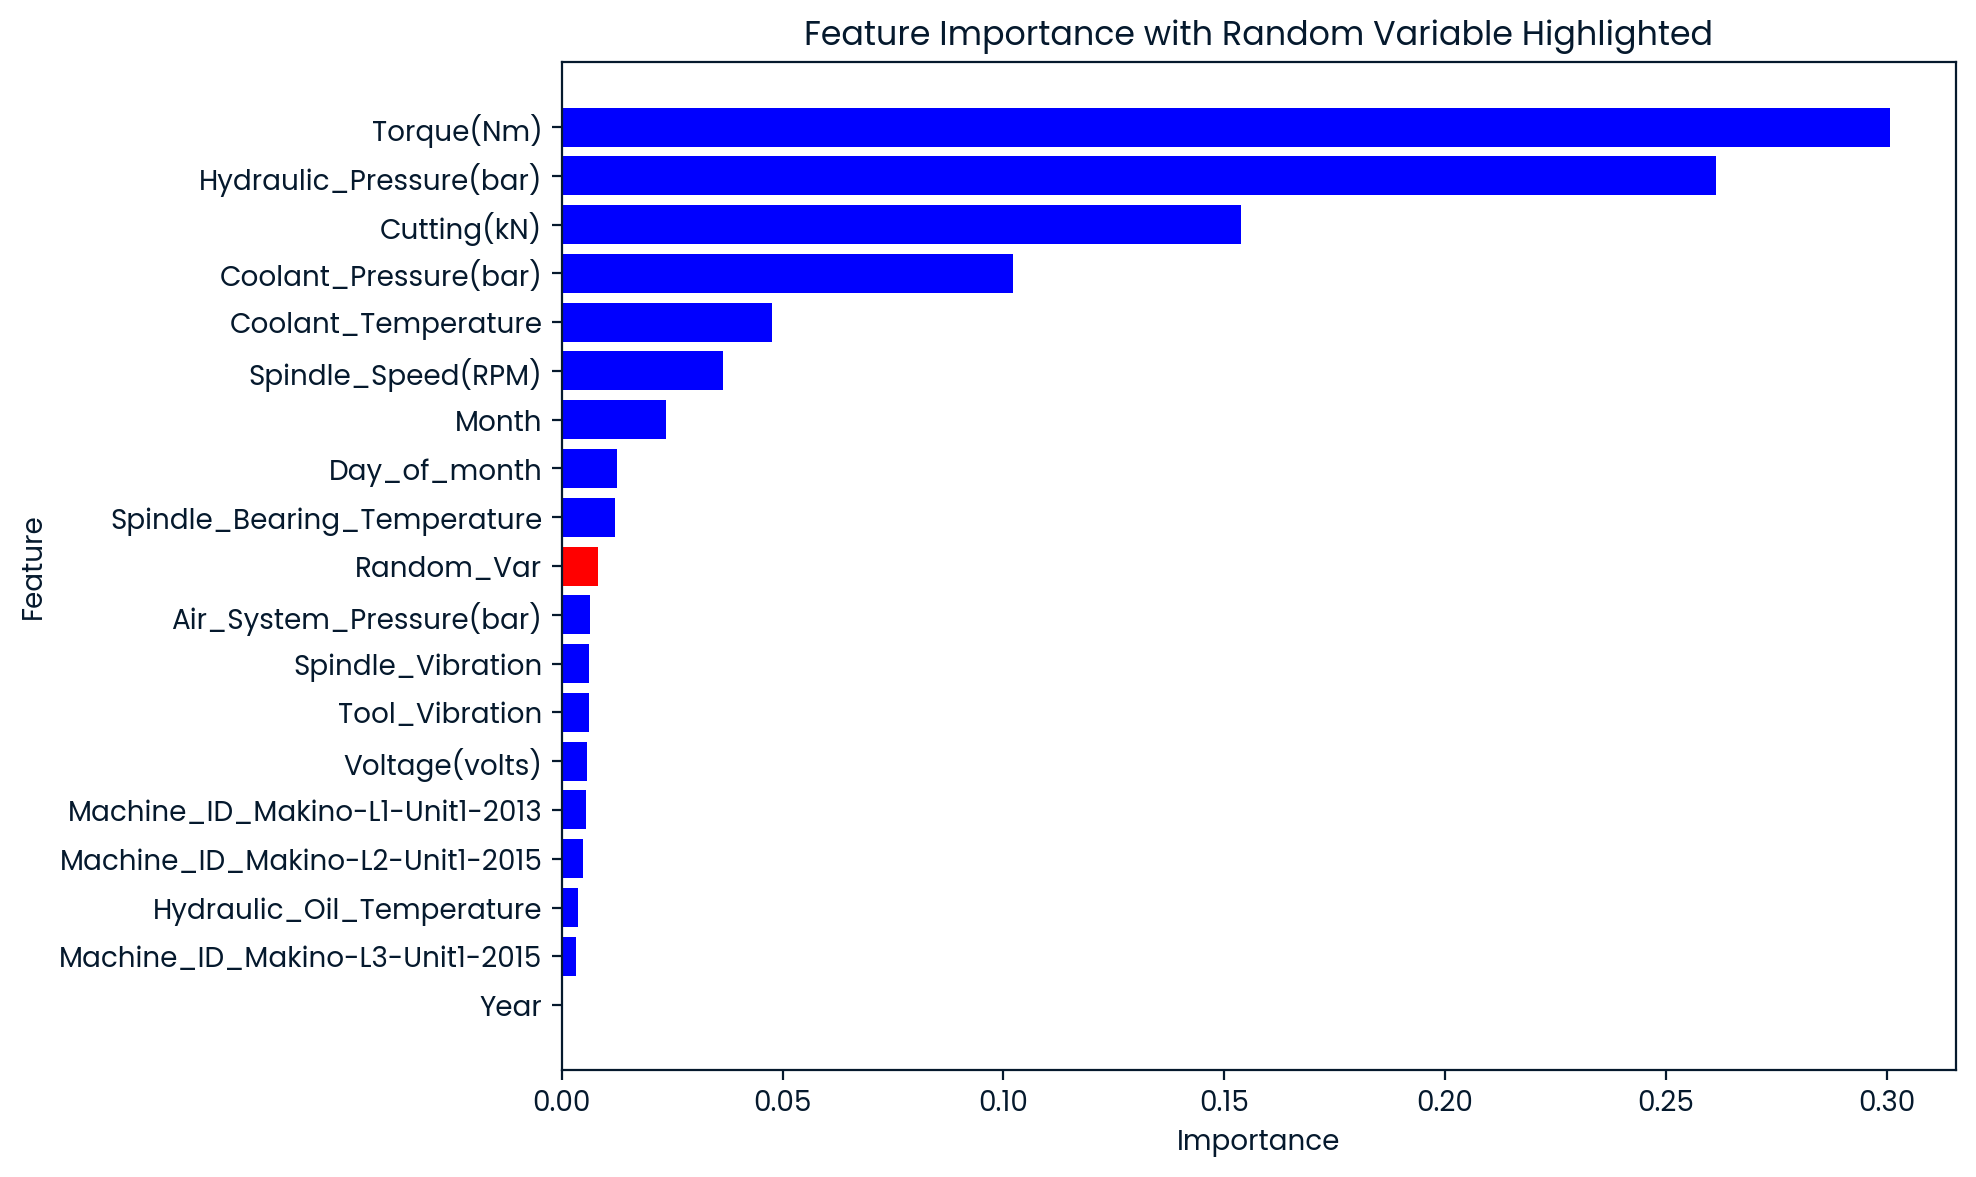

In [14]:
# Feature importance
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols).tolist()
feature_names += numeric_cols.tolist()

importances = best_model.feature_importances_
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Create DataFrame for visualization
importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Identify the position of the random variable
importance_df['Color'] = ['red' if feature == 'Random_Var' else 'blue' for feature in importance_df['Feature']]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=importance_df['Color'])
plt.gca().invert_yaxis()  # Invert Y axis so that the most important feature is at the top
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importance with Random Variable Highlighted')
plt.tight_layout()
plt.show()


It is observed that many variables are less important than the random variable, with a few barely surpassing it. The most important variables align with those identified in the descriptive analysis, such as torque, hydraulic pressure, cutting, coolant pressure and temperature, spindle speed, and lastly, the month.

### Final models (general model and specific models for each machine)

In this section, only the previously identified important variables are used to build the models. A global model is trained using the selected features for all machines, while individual models are also built for each machine using the same variables. This approach allows for both a general understanding of the factors affecting machine failures and a more personalized prediction for each specific machine, which can ensure higher accuracy and better performance.

In [15]:
# 1. Filter independent variables and target
X = downtime[["Machine_ID", "Torque(Nm)", "Hydraulic_Pressure(bar)", "Cutting(kN)", 
              "Coolant_Pressure(bar)", "Coolant_Temperature", "Spindle_Speed(RPM)", "Month"]]

y = downtime['Downtime (bn)']

# 2. Convert the 'Machine_ID' column to numeric variables (using one-hot encoding or mapping)
X = pd.get_dummies(X, columns=['Machine_ID'], drop_first=True)  # Using one-hot encoding for the Machine_ID column

scaler = StandardScaler()

# 3. Preprocess the data
X_scaled = scaler.fit_transform(X)

# 4. Split the data into training and testing sets for the single model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)


In [16]:
# 5. Prepare hyperparameter search
params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# 6. Create the single model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)

# 7. Hyperparameter search
cv = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=7)
cv.fit(X_train, y_train)

# 8. Best single model
best_model = cv.best_estimator_


In [17]:
# **Independent model for each machine**:

# Dictionary to store individual models
models_per_machine = {}

for machine_id in downtime['Machine_ID'].unique():
    # Filter data for each machine
    X_machine = X_scaled[downtime['Machine_ID'] == machine_id]
    y_machine = y[downtime['Machine_ID'] == machine_id]
    
    # Split data into training and testing sets for each machine
    X_train, X_test, y_train, y_test = train_test_split(X_machine, y_machine, test_size=0.2, random_state=7)
    
    # Create and train the model for the machine
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)
    cv = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=7)
    cv.fit(X_train, y_train)
    
    # Save the trained model
    models_per_machine[machine_id] = cv.best_estimator_


In [18]:
# Evaluation of the single model
print("Evaluation of the single model:")
y_pred = best_model.predict(X_test)
print("Classification report (single model):\n", classification_report(y_test, y_pred))
print("Accuracy (single model):", accuracy_score(y_test, y_pred))

# Evaluation of the models for each machine
for machine_id, model in models_per_machine.items():
    # Filter test data for each machine
    X_machine_test = X_scaled[downtime['Machine_ID'] == machine_id]
    y_machine_test = y[downtime['Machine_ID'] == machine_id]
    
    # Make prediction with the machine's model
    y_machine_pred = model.predict(X_machine_test)
    
    # Evaluate the model
    print(f"\nEvaluation of the model for {machine_id}:")
    print("Classification report:\n", classification_report(y_machine_test, y_machine_pred))
    print("Accuracy:", accuracy_score(y_machine_test, y_machine_pred))


Evaluation of the single model:
Classification report (single model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        76

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

Accuracy (single model): 1.0

Evaluation of the model for Makino-L1-Unit1-2013:
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       420
           1       1.00      1.00      1.00       454

    accuracy                           1.00       874
   macro avg       1.00      1.00      1.00       874
weighted avg       1.00      1.00      1.00       874

Accuracy: 0.9965675057208238

Evaluation of the model for Makino-L3-Unit1-2015:
Classification report:
               precision    recall  f1-score   support

           0

#### Results:
The results show that both the individual model and the machine-specific models perform with exceptionally high precision and recall, achieving perfect F1 scores of 1.00 for both classes. For the overall model, the precision is 1.00, indicating flawless performance. The machine-specific models also perform similarly, with accuracies ranging from 0.9965 to 0.9988, suggesting that each model is highly effective at predicting downtime for each individual machine. This demonstrates the robustness of the model, as it accurately identifies faults for both the overall case and for each machine separately.

Feature importance for the single model:


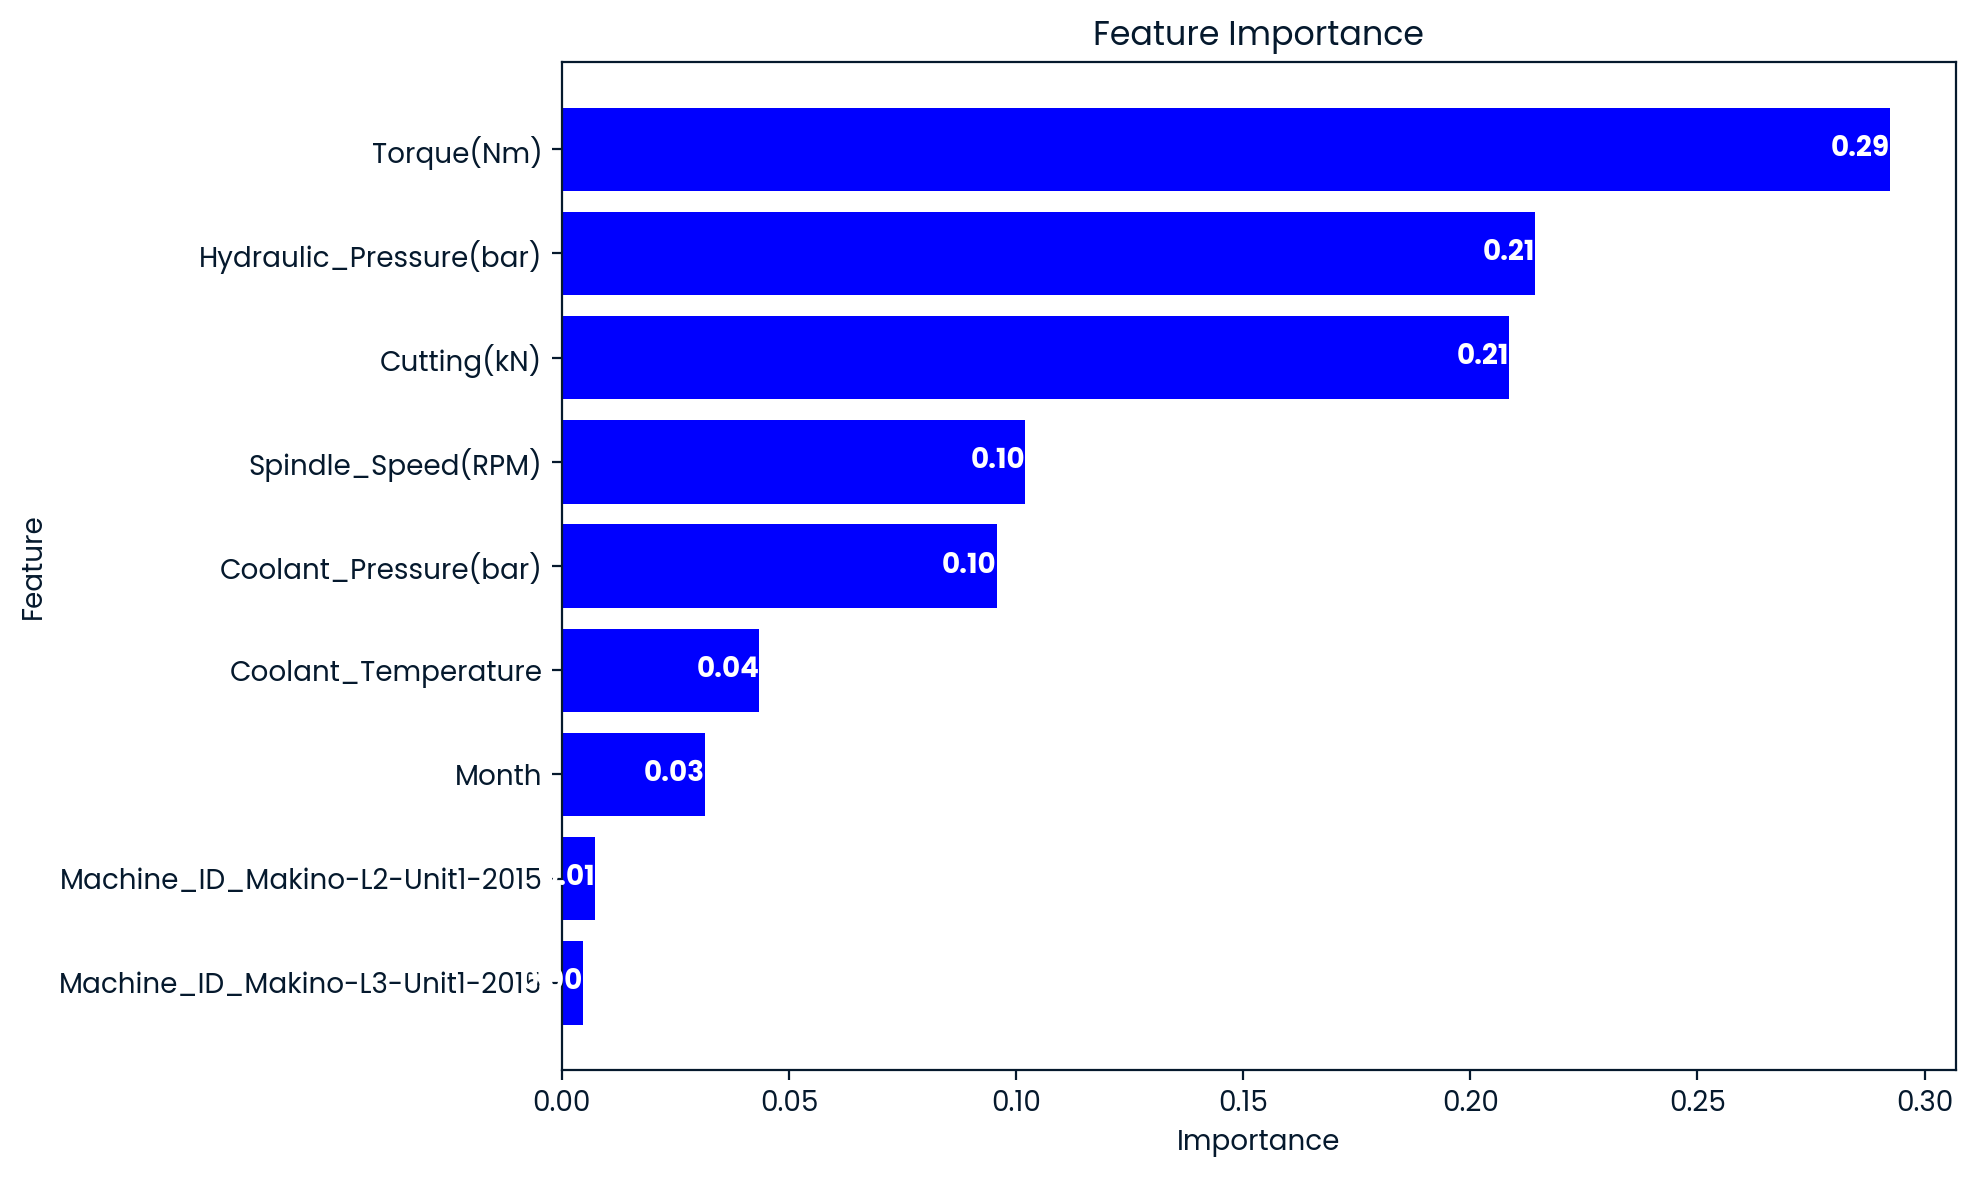


Feature importance for Makino-L1-Unit1-2013:


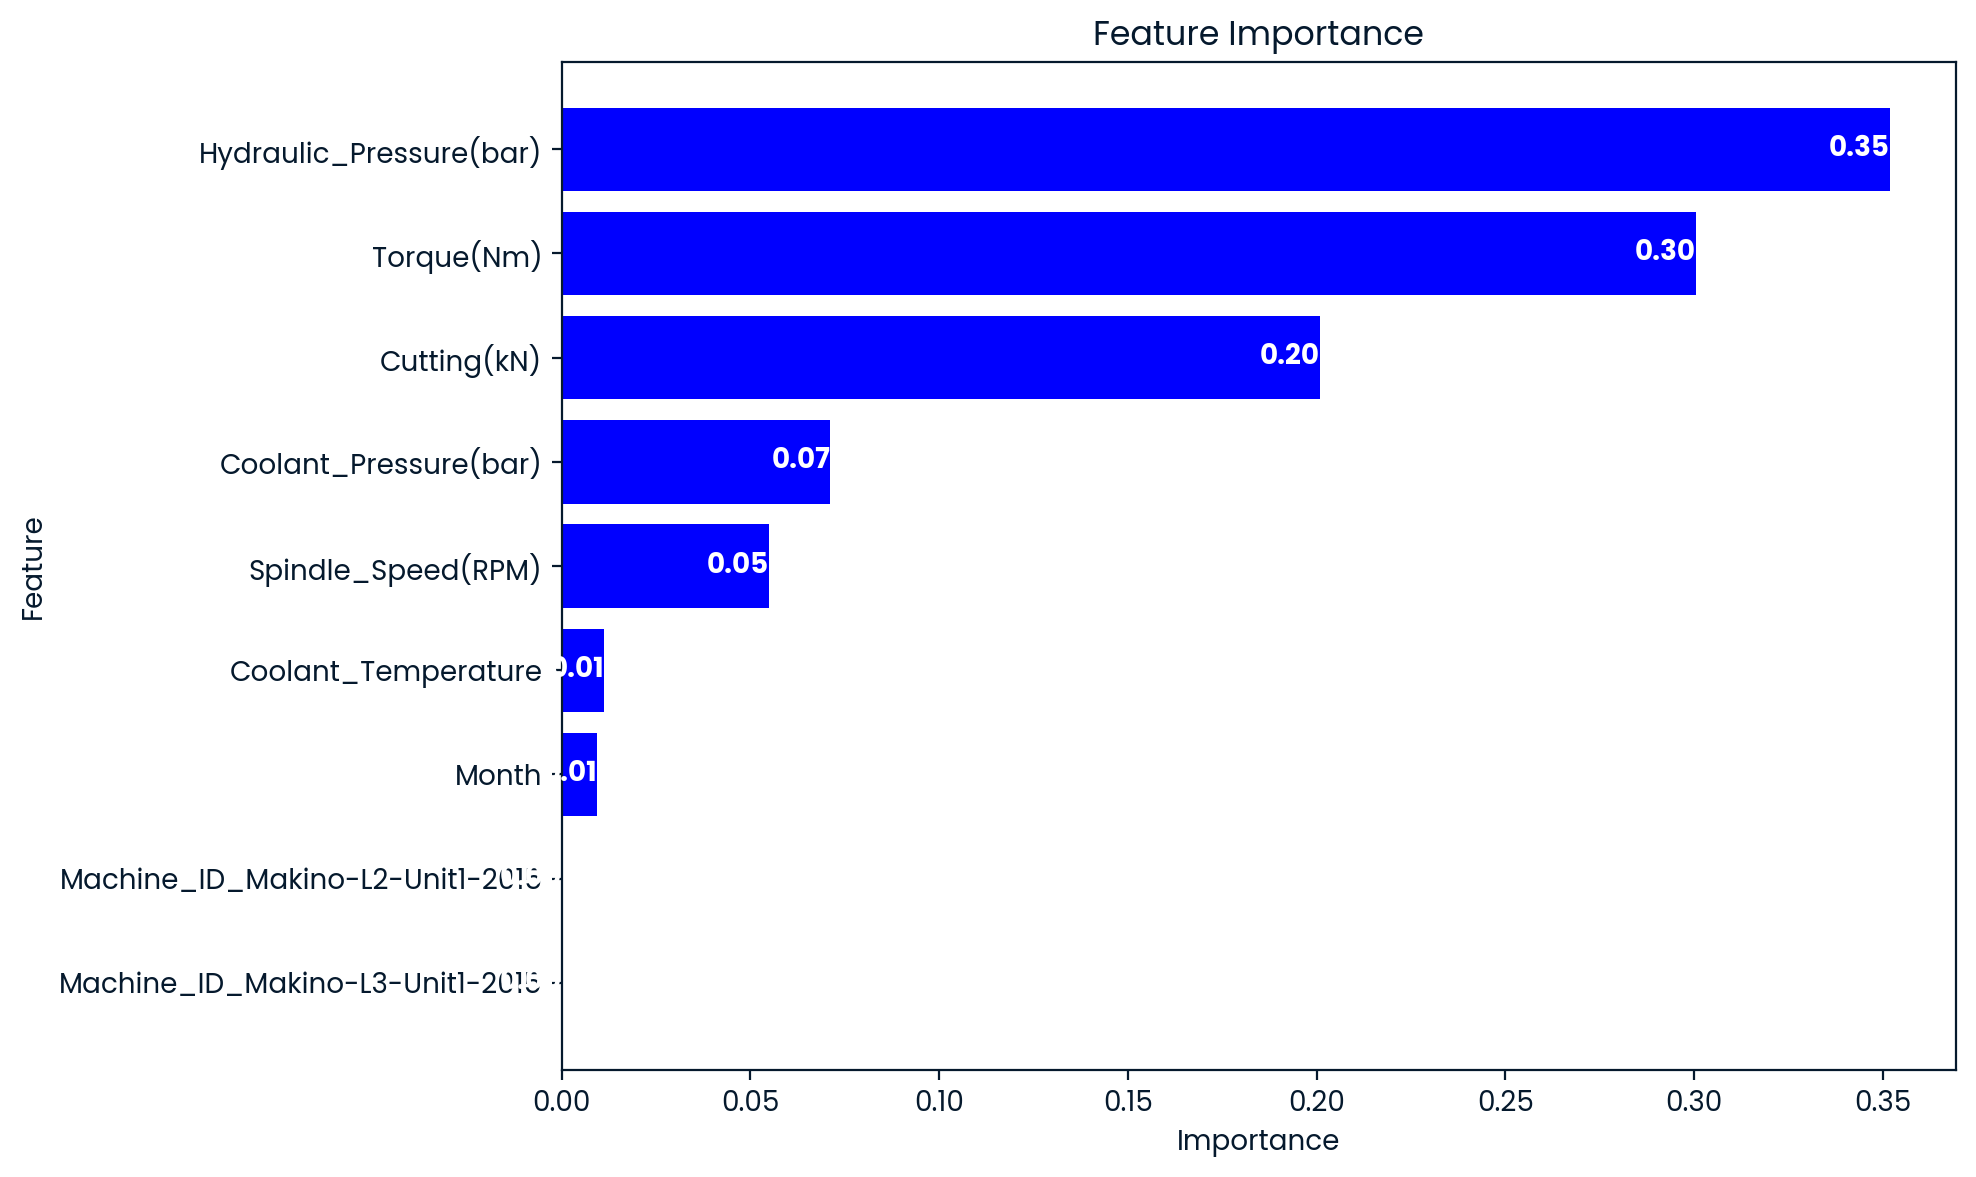


Feature importance for Makino-L3-Unit1-2015:


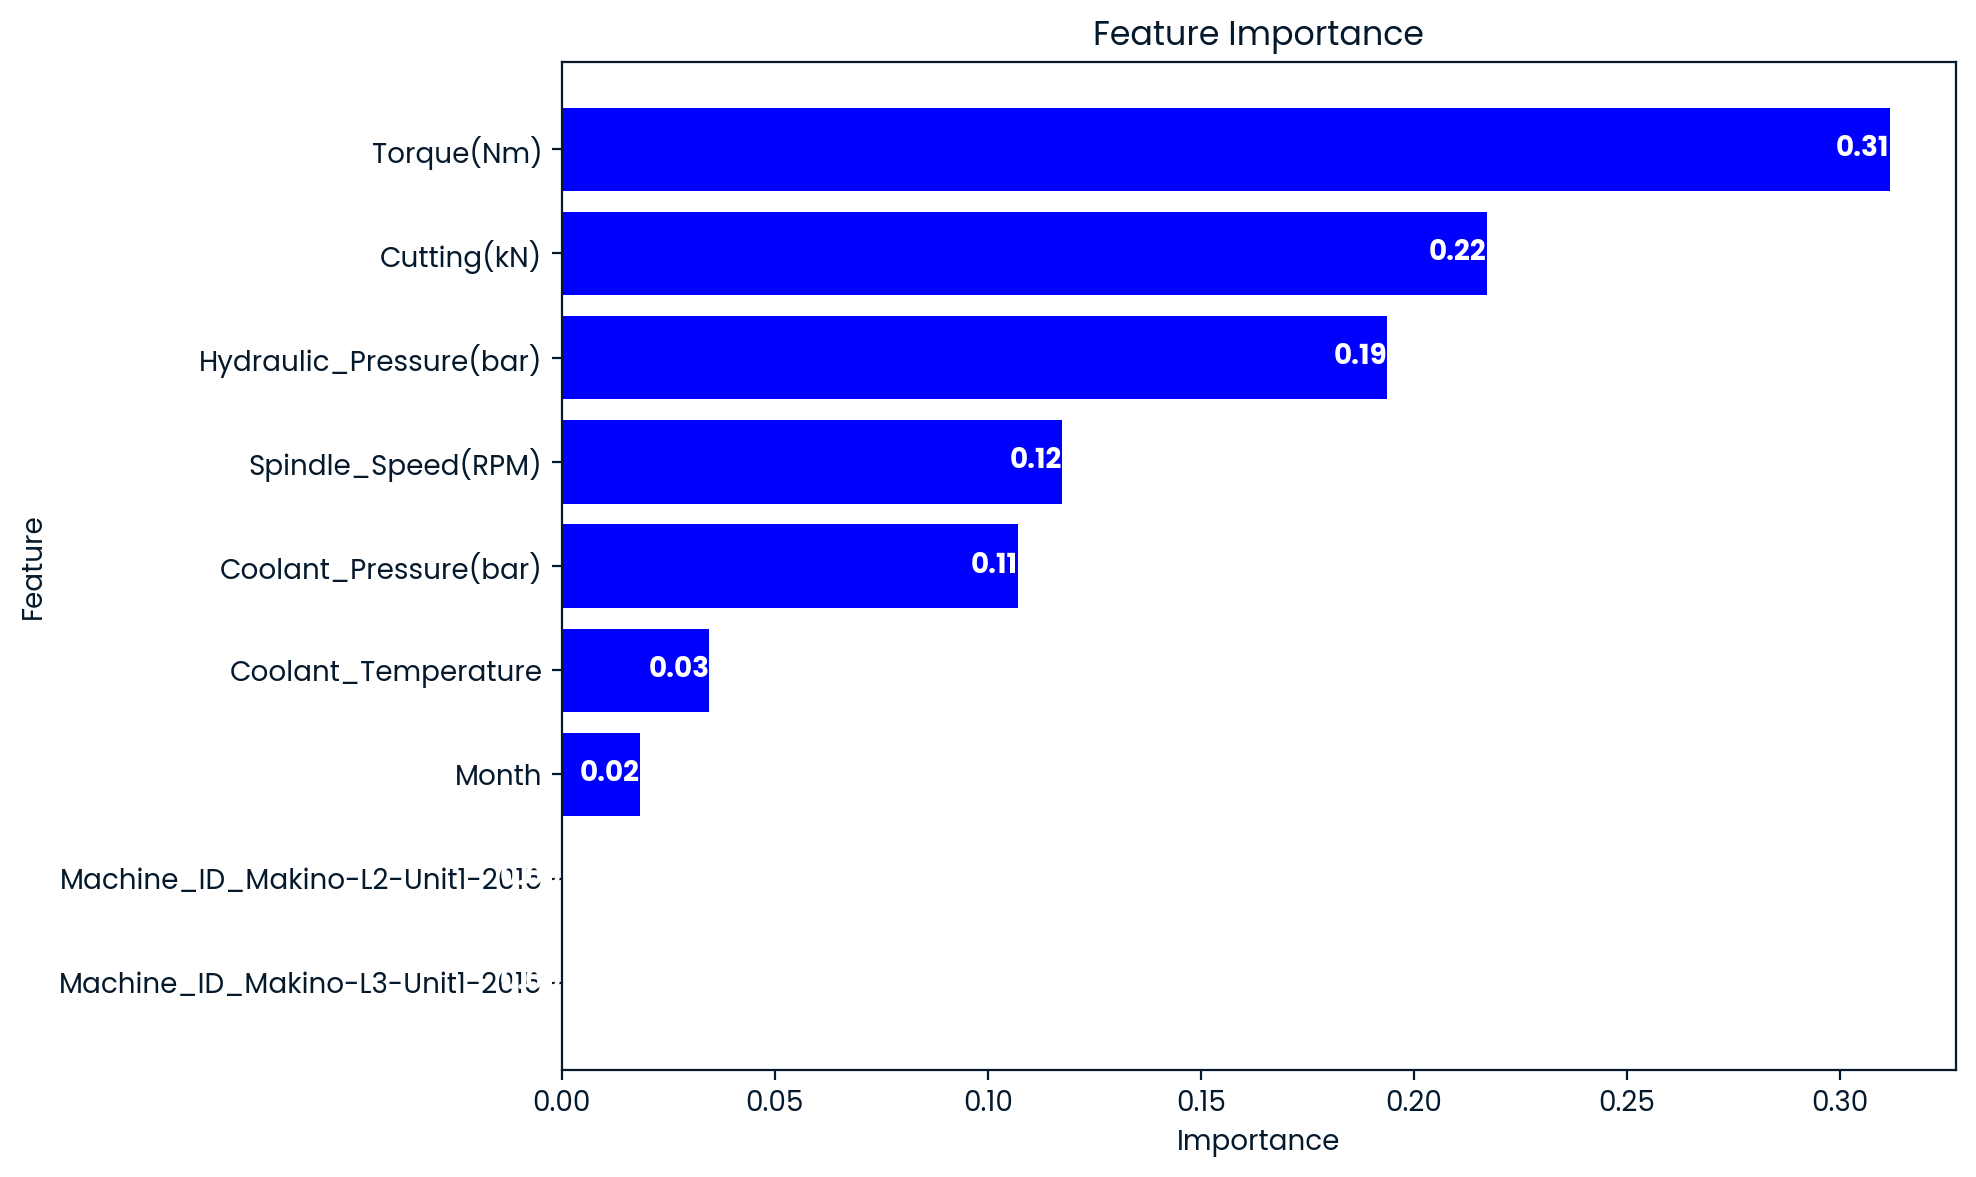


Feature importance for Makino-L2-Unit1-2015:


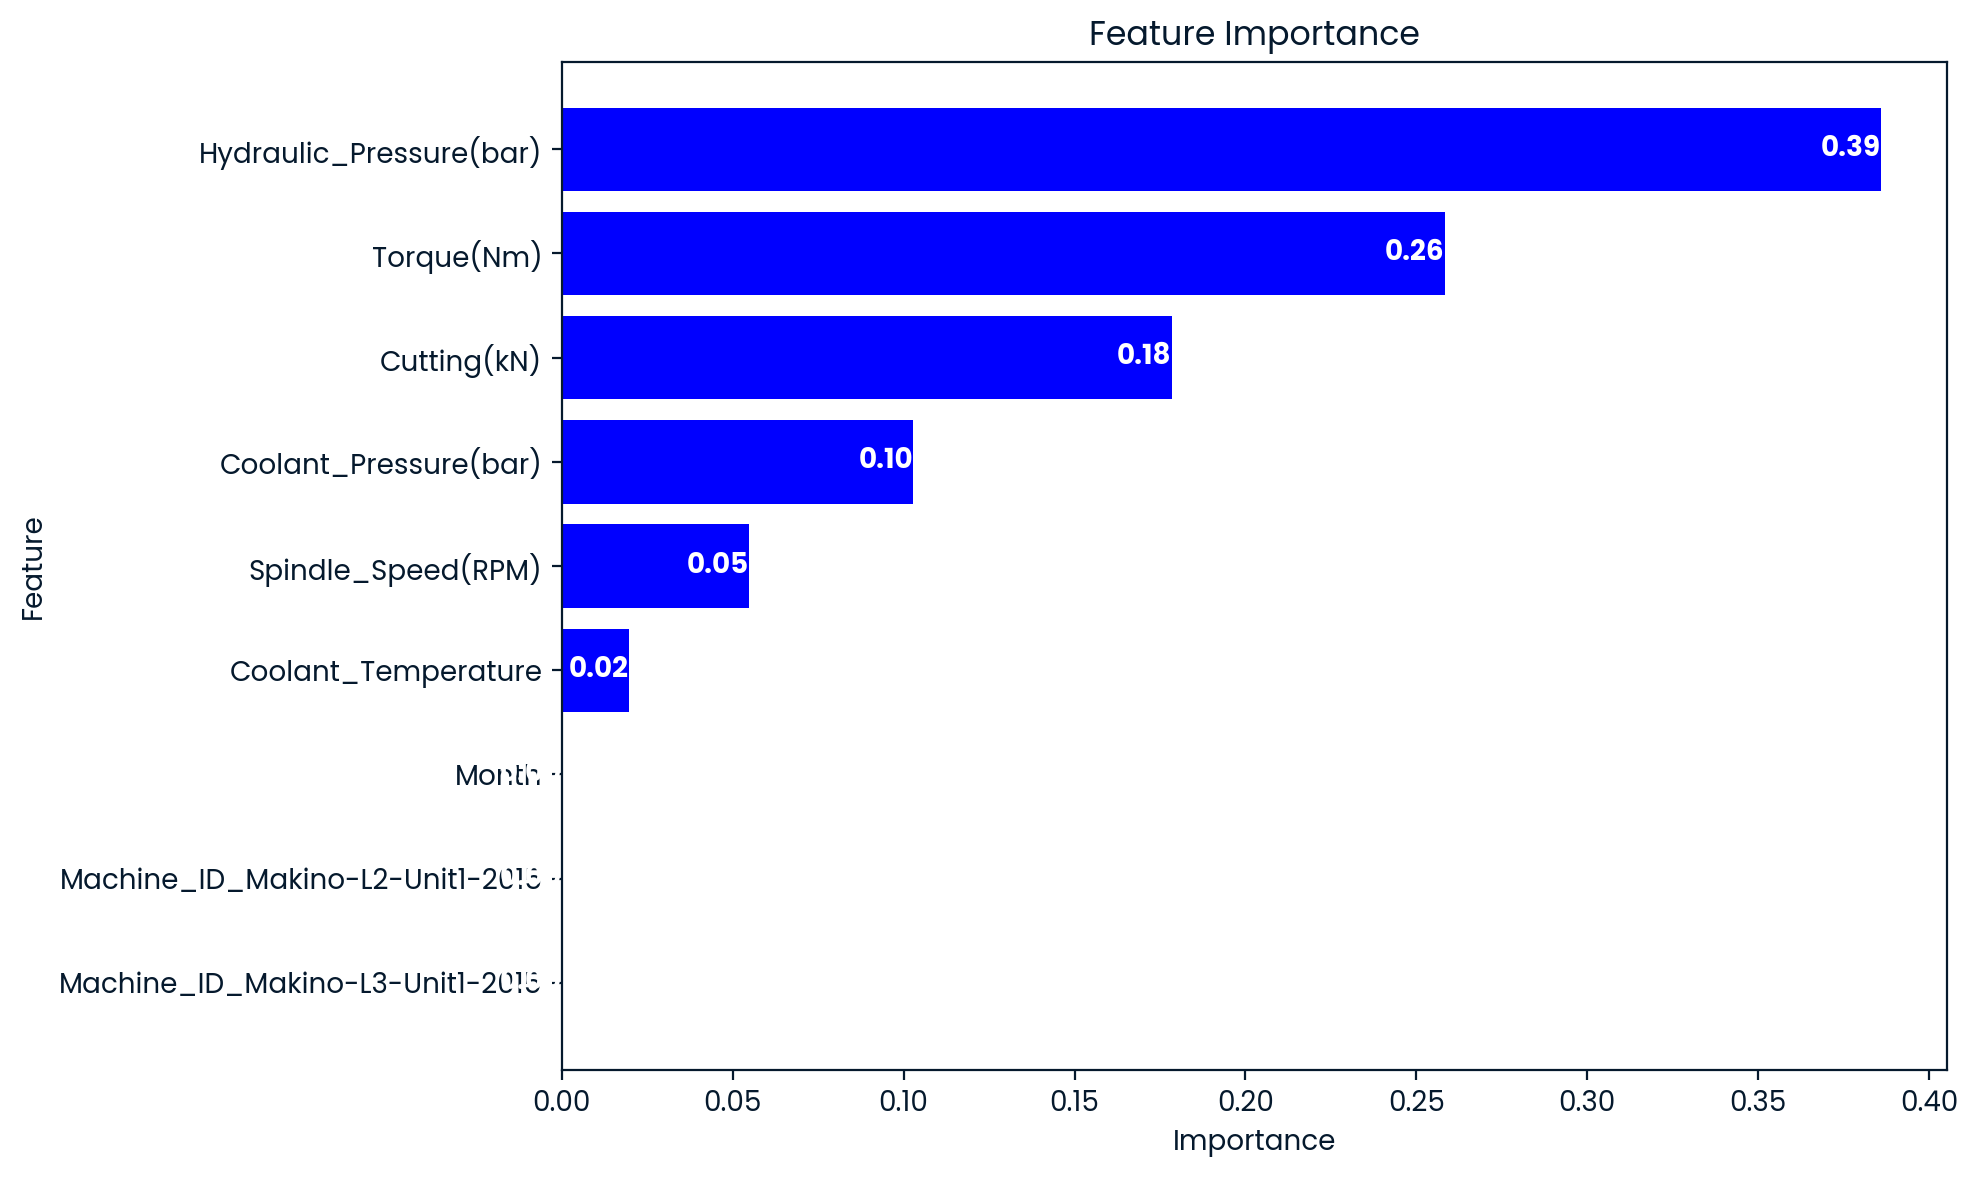

In [19]:
# Visualization of feature importance for the single model
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Identify the random variable to highlight it
    importance_df['Color'] = ['red' if feature == 'Random_Var' else 'blue' for feature in importance_df['Feature']]

    # Horizontal visualization
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=importance_df['Color'])
    plt.gca().invert_yaxis()

    for i, v in enumerate(importance_df['Importance']):
        plt.text(v, i, f'{v:.2f}', va='center', ha='right', color='white', fontweight='bold')

    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

# Evaluation of feature importance for the single model
print("Feature importance for the single model:")
plot_feature_importance(best_model, X.columns.tolist())

# Evaluation of feature importance for each machine model
for machine_id, model in models_per_machine.items():
    print(f"\nFeature importance for {machine_id}:")
    plot_feature_importance(model, X.columns.tolist())


The feature importance results show that, in the general model, **Torque (Nm) is the most relevant variable** with a value of 0.29, followed by **Hydraulic Pressure and Cutting**, both with 0.21, and finally Spindle Speed and Coolant Pressure, with 0.1 each, totaling 0.91.

For the **Makino-L1-Unit1-2013 machine**, the **most important variables are Hydraulic Pressure, Torque**, and Cutting, with importances of 0.35, 0.3, and 0.2, respectively, totaling 0.85.

In **the Makino-L2-Unit1-2015, the importances of Hydraulic Pressure, Torque**, and Cutting are 0.39, 0.26, and 0.18, respectively, totaling 0.83, with Hydraulic Pressure standing out more compared to the first machine.

Finally, in the **Makino-L3-Unit1-2015, Torque takes first place with 0.31, followed by Cutting with 0.22**, Hydraulic Pressure with 0.19, Spindle Speed with 0.12, and Coolant Pressure with 0.11, totaling 0.95.